# Fashion MNIST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.layer_utils import count_params
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(51000, 28, 28)
(51000,)
(9000, 28, 28)
(9000,)
(10000, 28, 28)
(10000,)


In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test, X_val = X_train/255, X_test/255, X_val/255
epochs = 25

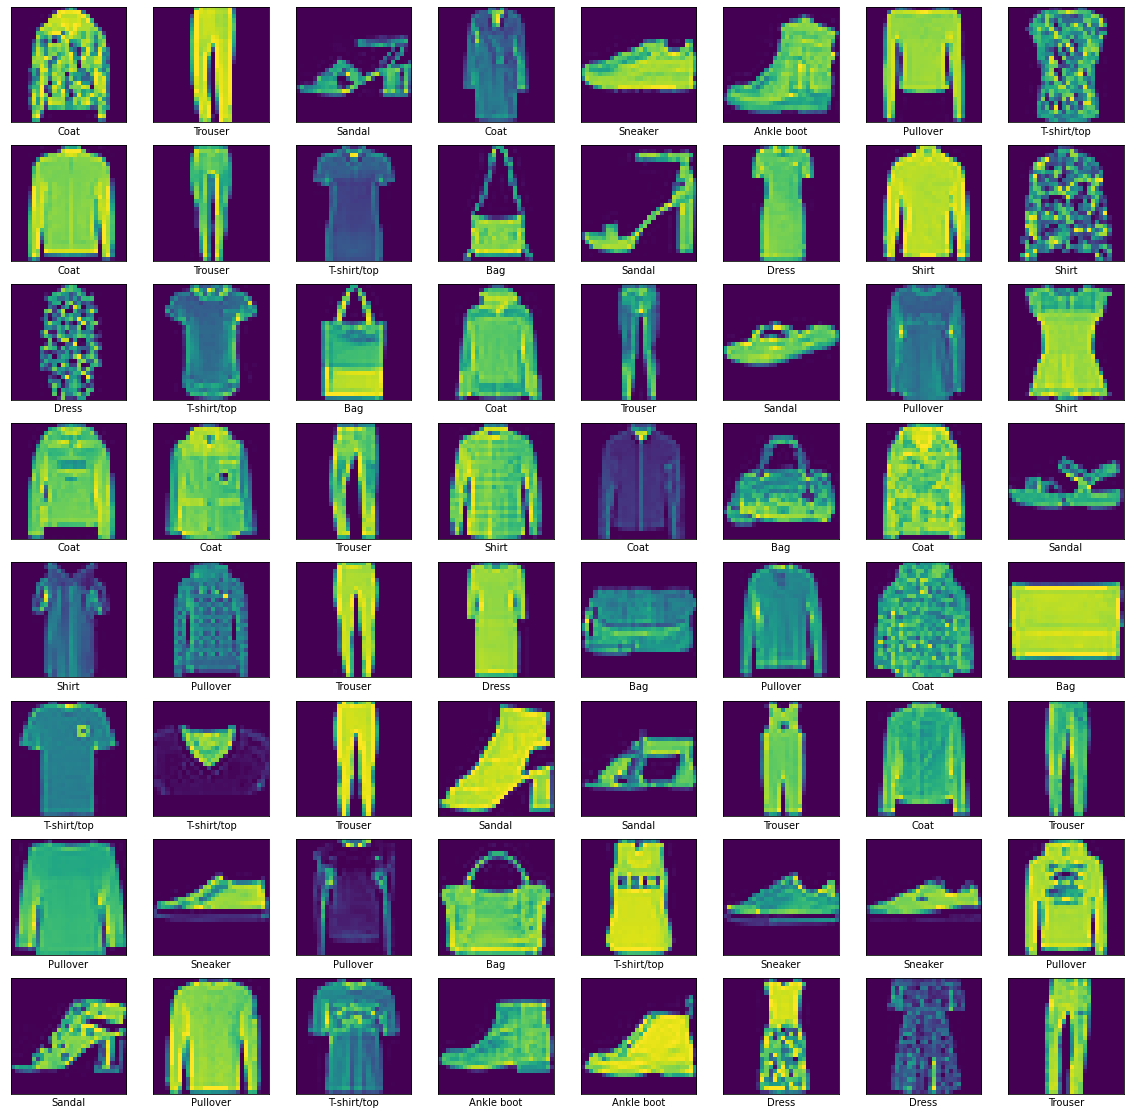

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20, 20))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
def plot_diagrams(history, epochs=epochs, h=20, w=8):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(h, w))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
def plot_confusion_matrix(y_test, y_pred, h=15, w=10):
    fig, ax = plt.subplots(figsize=(h, w))
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
    ax.yaxis.set_ticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

## Multilayer Perceptron (Fully Connected NN) με 3 κρυφά επίπεδα, 64, 128 και 256 και αρχικό και τελικό επίπεδο κατάλληλου μεγέθους.

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/25
1594/1594 [==============================] - 8s 3ms/step - loss: 0.5118 - accuracy: 0.8160 - val_loss: 0.4333 - val_accuracy: 0.8352
Epoch 2/25
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3805 - accuracy: 0.8595 - val_loss: 0.3928 - val_accuracy: 0.8543
Epoch 3/25
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3425 - accuracy: 0.8745 - val_loss: 0.3641 - val_accuracy: 0.8711
Epoch 4/25
1594/1594 [==============================] - 9s 5ms/step - loss: 0.3214 - accuracy: 0.8813 - val_loss: 0.3703 - val_accuracy: 0.8644
Epoch 5/25
1594/1594 [==============================] - 7s 5ms/step - loss: 0.3014 - accuracy: 0.8871 - val_loss: 0.3415 - val_accuracy: 0.8768
Epoch 6/25
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2889 - accuracy: 0.8907 - val_loss: 0.3297 - val_accuracy: 0.8802
Epoch 7/25
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2758 - accuracy: 0.8957 - val_loss: 0.3382 - val_accuracy:

In [ ]:
train_loss1, train_acc1 = model1.evaluate(X_train,  y_train, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc1*100) + "%")

1594/1594 - 3s - loss: 0.1654 - accuracy: 0.9339 - 3s/epoch - 2ms/step
Train accuracy: 93.39%


In [ ]:
test_loss1, test_acc1 = model1.evaluate(X_test,  y_test, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc1*100) + "%")

313/313 - 1s - loss: 0.4223 - accuracy: 0.8801 - 589ms/epoch - 2ms/step
Test accuracy: 88.01%


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainable_params1 = count_params(model1.trainable_weights)
non_trainable_params1 = count_params(model1.non_trainable_weights)
print("Trainable params:", trainable_params1)
print("Non trainable params:", non_trainable_params1)

Trainable params: 94154
Non trainable params: 0


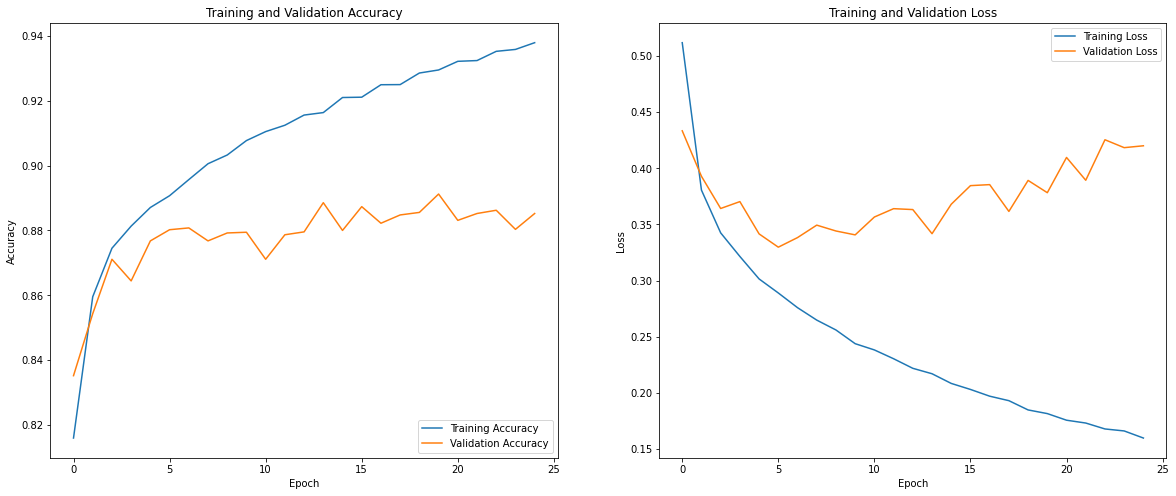

In [ ]:
plot_diagrams(history1)

313/313 [==============================] - 1s 2ms/step


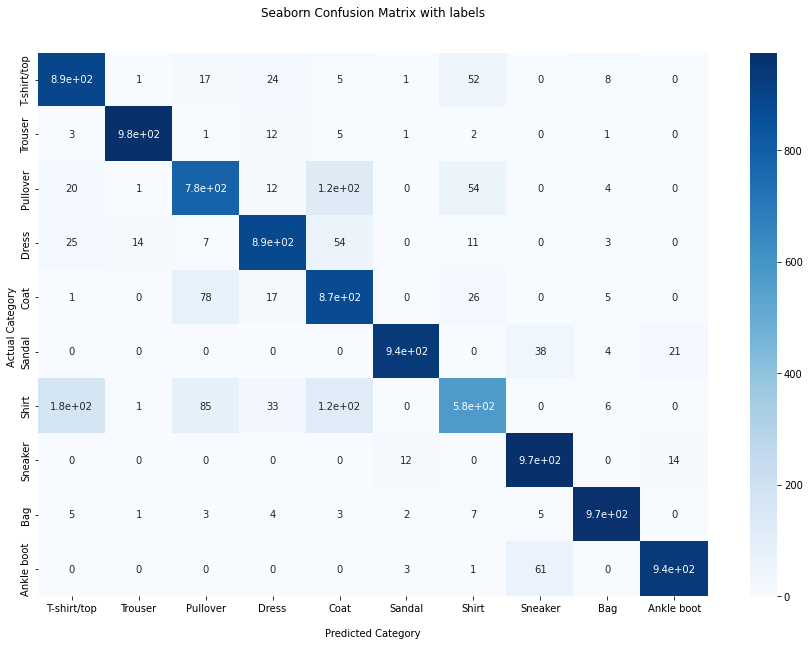

In [ ]:
predicted_labels1 = model1.predict(X_test)
predicted_classes1 = np.argmax(predicted_labels1, axis=1)
plot_confusion_matrix(y_test, predicted_classes1)

## CNN με 2 κρυφά επίπεδα με max pooling μετά απο κάθε ένα, με 32 και 64 φίλτρα.

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='linear')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/25
1594/1594 [==============================] - 13s 4ms/step - loss: 0.4954 - accuracy: 0.8238 - val_loss: 0.3800 - val_accuracy: 0.8624
Epoch 2/25
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3415 - accuracy: 0.8782 - val_loss: 0.3294 - val_accuracy: 0.8837
Epoch 3/25
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3023 - accuracy: 0.8920 - val_loss: 0.3169 - val_accuracy: 0.8914
Epoch 4/25
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2714 - accuracy: 0.9021 - val_loss: 0.3015 - val_accuracy: 0.8898
Epoch 5/25
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2530 - accuracy: 0.9083 - val_loss: 0.2668 - val_accuracy: 0.9037
Epoch 6/25
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2342 - accuracy: 0.9152 - val_loss: 0.2661 - val_accuracy: 0.9050
Epoch 7/25
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2181 - accuracy: 0.9208 - val_loss: 0.2814 - val_accuracy

In [ ]:
train_loss2, train_acc2 = model2.evaluate(X_train,  y_train, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc2*100) + "%")

1594/1594 - 3s - loss: 0.0870 - accuracy: 0.9684 - 3s/epoch - 2ms/step
Train accuracy: 96.84%


In [ ]:
test_loss2, test_acc2 = model2.evaluate(X_test,  y_test, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc2*100) + "%")

313/313 - 1s - loss: 0.3807 - accuracy: 0.8967 - 704ms/epoch - 2ms/step
Test accuracy: 89.67%


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
trainable_params2 = count_params(model2.trainable_weights)
non_trainable_params2 = count_params(model2.non_trainable_weights)
print("Trainable params:", trainable_params2)
print("Non trainable params:", non_trainable_params2)

Trainable params: 34826
Non trainable params: 0


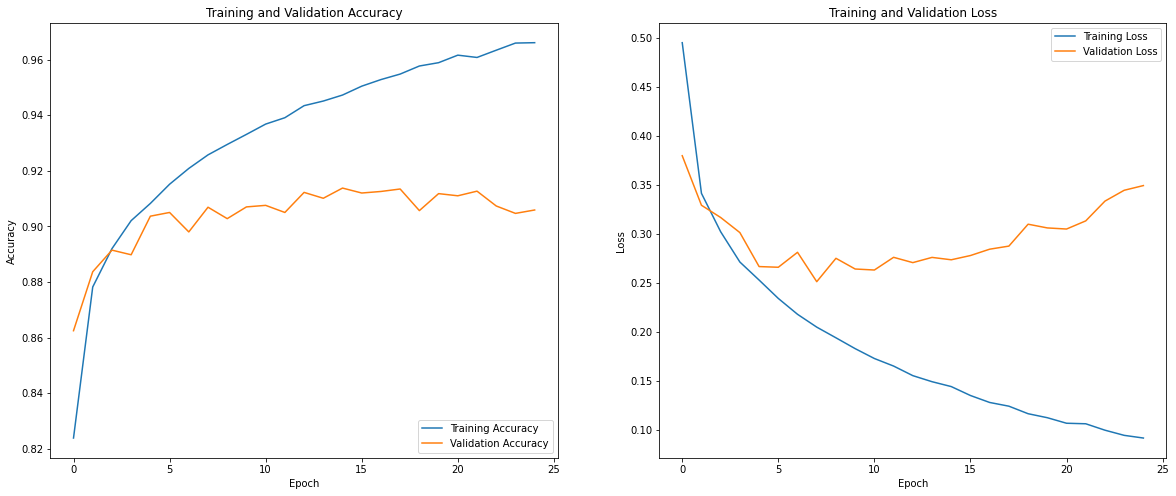

In [ ]:
plot_diagrams(history2)

313/313 [==============================] - 1s 2ms/step


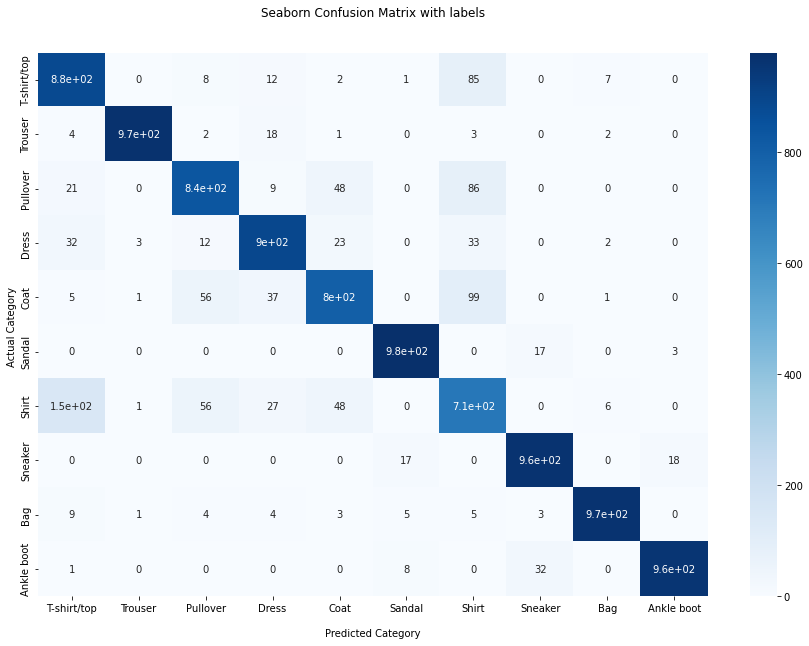

In [ ]:
predicted_labels2 = model2.predict(X_test)
predicted_classes2 = np.argmax(predicted_labels2, axis=1)
plot_confusion_matrix(y_test, predicted_classes2)

## Το νευρωνικό δικιάς σας έμπνευσης που θα στοχεύει σε μέγιστη ακρίβεια ή μέγιστο efficiency.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.layer_utils import count_params
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

batch_size = 64
steps_per_epoch = X_train.shape[0]*0.85 // batch_size
validation_steps = X_train.shape[0]*0.15 // batch_size

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.15, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    rotation_range=5,
    zoom_range=0.05
    )
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Fashion Mnist Best Model'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=3, min_lr=1e-6)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from keras import regularizers

model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding="same", kernel_initializer='lecun_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer='lecun_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer='lecun_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='lecun_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='lecun_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='lecun_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='lecun_uniform', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-5), bias_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='lecun_uniform', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-5), bias_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(datagen.flow(X_train, y_train, batch_size=batch_size, subset='training'),
                        steps_per_epoch = steps_per_epoch,
                        validation_data=datagen.flow(X_train, y_train, batch_size=batch_size, subset='validation'),
                        validation_steps = validation_steps, epochs=500, batch_size=64, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/500
795/796 [============================>.] - ETA: 0s - loss: 0.6150 - accuracy: 0.7967

796/796 [==============================] - 32s 38ms/step - loss: 0.6150 - accuracy: 0.7967 - val_loss: 0.4983 - val_accuracy: 0.8356 - lr: 0.0010
Epoch 2/500
795/796 [============================>.] - ETA: 0s - loss: 0.4269 - accuracy: 0.8636

796/796 [==============================] - 28s 35ms/step - loss: 0.4268 - accuracy: 0.8636 - val_loss: 0.4015 - val_accuracy: 0.8694 - lr: 0.0010
Epoch 3/500
796/796 [==============================] - ETA: 0s - loss: 0.3815 - accuracy: 0.8795

796/796 [==============================] - 30s 38ms/step - loss: 0.3815 - accuracy: 0.8795 - val_loss: 0.3581 - val_accuracy: 0.8868 - lr: 0.0010
Epoch 4/500
796/796 [==============================] - 24s 31ms/step - loss: 0.3610 - accuracy: 0.8860 - val_loss: 0.4283 - val_accuracy: 0.8590 - lr: 0.0010
Epoch 5/500
796/796 [==============================] - 27s 34ms/step - loss: 0.3428 - accuracy: 0.8959 - val_loss: 0.3681 - val_accuracy: 0.8833 - lr: 0.0010
Epoch 6/500
794/796 [============================>.] - ETA: 0s - loss: 0.3304 - accuracy: 0.8992

796/796 [==============================] - 28s 36ms/step - loss: 0.3306 - accuracy: 0.8991 - val_loss: 0.3489 - val_accuracy: 0.8950 - lr: 0.0010
Epoch 7/500
796/796 [==============================] - 29s 36ms/step - loss: 0.3247 - accuracy: 0.9040 - val_loss: 0.3683 - val_accuracy: 0.8853 - lr: 0.0010
Epoch 8/500
795/796 [============================>.] - ETA: 0s - loss: 0.3210 - accuracy: 0.9063

796/796 [==============================] - 29s 36ms/step - loss: 0.3210 - accuracy: 0.9064 - val_loss: 0.3412 - val_accuracy: 0.8979 - lr: 0.0010
Epoch 9/500
795/796 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.9078

796/796 [==============================] - 28s 35ms/step - loss: 0.3140 - accuracy: 0.9078 - val_loss: 0.3103 - val_accuracy: 0.9090 - lr: 0.0010
Epoch 10/500
796/796 [==============================] - 26s 32ms/step - loss: 0.3053 - accuracy: 0.9104 - val_loss: 0.3154 - val_accuracy: 0.9085 - lr: 0.0010
Epoch 11/500
796/796 [==============================] - 26s 33ms/step - loss: 0.2994 - accuracy: 0.9144 - val_loss: 0.3242 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 12/500
796/796 [==============================] - 27s 34ms/step - loss: 0.2970 - accuracy: 0.9153 - val_loss: 0.3277 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 13/500
795/796 [============================>.] - ETA: 0s - loss: 0.2754 - accuracy: 0.9226

796/796 [==============================] - 28s 35ms/step - loss: 0.2753 - accuracy: 0.9225 - val_loss: 0.2769 - val_accuracy: 0.9175 - lr: 6.0000e-04
Epoch 14/500
796/796 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.9245

796/796 [==============================] - 32s 41ms/step - loss: 0.2648 - accuracy: 0.9245 - val_loss: 0.2617 - val_accuracy: 0.9275 - lr: 6.0000e-04
Epoch 15/500
796/796 [==============================] - ETA: 0s - loss: 0.2587 - accuracy: 0.9266

796/796 [==============================] - 31s 39ms/step - loss: 0.2587 - accuracy: 0.9266 - val_loss: 0.2562 - val_accuracy: 0.9253 - lr: 6.0000e-04
Epoch 16/500
796/796 [==============================] - 31s 39ms/step - loss: 0.2553 - accuracy: 0.9267 - val_loss: 0.2572 - val_accuracy: 0.9266 - lr: 6.0000e-04
Epoch 17/500
796/796 [==============================] - 27s 34ms/step - loss: 0.2521 - accuracy: 0.9275 - val_loss: 0.2609 - val_accuracy: 0.9252 - lr: 6.0000e-04
Epoch 18/500
796/796 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.9308

796/796 [==============================] - 31s 39ms/step - loss: 0.2474 - accuracy: 0.9308 - val_loss: 0.2496 - val_accuracy: 0.9285 - lr: 6.0000e-04
Epoch 19/500
796/796 [==============================] - ETA: 0s - loss: 0.2447 - accuracy: 0.9308

796/796 [==============================] - 33s 42ms/step - loss: 0.2447 - accuracy: 0.9308 - val_loss: 0.2426 - val_accuracy: 0.9306 - lr: 6.0000e-04
Epoch 20/500
796/796 [==============================] - 26s 32ms/step - loss: 0.2455 - accuracy: 0.9306 - val_loss: 0.2606 - val_accuracy: 0.9247 - lr: 6.0000e-04
Epoch 21/500
795/796 [============================>.] - ETA: 0s - loss: 0.2445 - accuracy: 0.9298

796/796 [==============================] - 29s 36ms/step - loss: 0.2445 - accuracy: 0.9298 - val_loss: 0.2424 - val_accuracy: 0.9283 - lr: 6.0000e-04
Epoch 22/500
795/796 [============================>.] - ETA: 0s - loss: 0.2430 - accuracy: 0.9320

796/796 [==============================] - 28s 36ms/step - loss: 0.2429 - accuracy: 0.9320 - val_loss: 0.2406 - val_accuracy: 0.9318 - lr: 6.0000e-04
Epoch 23/500
796/796 [==============================] - 24s 30ms/step - loss: 0.2398 - accuracy: 0.9317 - val_loss: 0.2544 - val_accuracy: 0.9253 - lr: 6.0000e-04
Epoch 24/500
796/796 [==============================] - 25s 31ms/step - loss: 0.2339 - accuracy: 0.9347 - val_loss: 0.2441 - val_accuracy: 0.9301 - lr: 6.0000e-04
Epoch 25/500
795/796 [============================>.] - ETA: 0s - loss: 0.2365 - accuracy: 0.9323

796/796 [==============================] - 29s 37ms/step - loss: 0.2365 - accuracy: 0.9323 - val_loss: 0.2396 - val_accuracy: 0.9320 - lr: 6.0000e-04
Epoch 26/500
796/796 [==============================] - 27s 33ms/step - loss: 0.2296 - accuracy: 0.9351 - val_loss: 0.2478 - val_accuracy: 0.9289 - lr: 6.0000e-04
Epoch 27/500
795/796 [============================>.] - ETA: 0s - loss: 0.2312 - accuracy: 0.9346

796/796 [==============================] - 31s 39ms/step - loss: 0.2312 - accuracy: 0.9346 - val_loss: 0.2362 - val_accuracy: 0.9329 - lr: 6.0000e-04
Epoch 28/500
796/796 [==============================] - 25s 32ms/step - loss: 0.2314 - accuracy: 0.9348 - val_loss: 0.2441 - val_accuracy: 0.9292 - lr: 6.0000e-04
Epoch 29/500
796/796 [==============================] - 25s 32ms/step - loss: 0.2272 - accuracy: 0.9370 - val_loss: 0.2408 - val_accuracy: 0.9304 - lr: 6.0000e-04
Epoch 30/500
796/796 [==============================] - 27s 34ms/step - loss: 0.2299 - accuracy: 0.9352 - val_loss: 0.2541 - val_accuracy: 0.9286 - lr: 6.0000e-04
Epoch 31/500
796/796 [==============================] - ETA: 0s - loss: 0.2135 - accuracy: 0.9401

796/796 [==============================] - 31s 39ms/step - loss: 0.2135 - accuracy: 0.9401 - val_loss: 0.2282 - val_accuracy: 0.9359 - lr: 3.6000e-04
Epoch 32/500
795/796 [============================>.] - ETA: 0s - loss: 0.2102 - accuracy: 0.9410

796/796 [==============================] - 28s 35ms/step - loss: 0.2101 - accuracy: 0.9411 - val_loss: 0.2199 - val_accuracy: 0.9379 - lr: 3.6000e-04
Epoch 33/500
796/796 [==============================] - 26s 33ms/step - loss: 0.2024 - accuracy: 0.9427 - val_loss: 0.2214 - val_accuracy: 0.9368 - lr: 3.6000e-04
Epoch 34/500
796/796 [==============================] - 29s 36ms/step - loss: 0.2028 - accuracy: 0.9439 - val_loss: 0.2252 - val_accuracy: 0.9350 - lr: 3.6000e-04
Epoch 35/500
795/796 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9436

796/796 [==============================] - 29s 37ms/step - loss: 0.2010 - accuracy: 0.9436 - val_loss: 0.2133 - val_accuracy: 0.9374 - lr: 3.6000e-04
Epoch 36/500
796/796 [==============================] - 25s 32ms/step - loss: 0.1990 - accuracy: 0.9434 - val_loss: 0.2341 - val_accuracy: 0.9323 - lr: 3.6000e-04
Epoch 37/500
796/796 [==============================] - 30s 38ms/step - loss: 0.1975 - accuracy: 0.9444 - val_loss: 0.2320 - val_accuracy: 0.9336 - lr: 3.6000e-04
Epoch 38/500
796/796 [==============================] - 28s 35ms/step - loss: 0.1988 - accuracy: 0.9435 - val_loss: 0.2149 - val_accuracy: 0.9402 - lr: 3.6000e-04
Epoch 39/500
796/796 [==============================] - 30s 38ms/step - loss: 0.1913 - accuracy: 0.9460 - val_loss: 0.2193 - val_accuracy: 0.9339 - lr: 2.1600e-04
Epoch 40/500
796/796 [==============================] - 30s 37ms/step - loss: 0.1856 - accuracy: 0.9483 - val_loss: 0.2221 - val_accuracy: 0.9387 - lr: 2.1600e-04
Epoch 41/500
796/796 [=============

796/796 [==============================] - 30s 37ms/step - loss: 0.1777 - accuracy: 0.9509 - val_loss: 0.2110 - val_accuracy: 0.9391 - lr: 1.2960e-04
Epoch 43/500
796/796 [==============================] - ETA: 0s - loss: 0.1730 - accuracy: 0.9519

796/796 [==============================] - 29s 37ms/step - loss: 0.1730 - accuracy: 0.9519 - val_loss: 0.2097 - val_accuracy: 0.9406 - lr: 1.2960e-04
Epoch 44/500
796/796 [==============================] - ETA: 0s - loss: 0.1729 - accuracy: 0.9522

796/796 [==============================] - 28s 35ms/step - loss: 0.1729 - accuracy: 0.9522 - val_loss: 0.2080 - val_accuracy: 0.9385 - lr: 1.2960e-04
Epoch 45/500
795/796 [============================>.] - ETA: 0s - loss: 0.1723 - accuracy: 0.9523

796/796 [==============================] - 28s 36ms/step - loss: 0.1722 - accuracy: 0.9523 - val_loss: 0.2072 - val_accuracy: 0.9403 - lr: 1.2960e-04
Epoch 46/500
796/796 [==============================] - ETA: 0s - loss: 0.1707 - accuracy: 0.9522

796/796 [==============================] - 30s 38ms/step - loss: 0.1707 - accuracy: 0.9522 - val_loss: 0.2060 - val_accuracy: 0.9406 - lr: 1.2960e-04
Epoch 47/500
796/796 [==============================] - 27s 34ms/step - loss: 0.1671 - accuracy: 0.9531 - val_loss: 0.2123 - val_accuracy: 0.9393 - lr: 1.2960e-04
Epoch 48/500
796/796 [==============================] - ETA: 0s - loss: 0.1675 - accuracy: 0.9539

796/796 [==============================] - 28s 35ms/step - loss: 0.1675 - accuracy: 0.9539 - val_loss: 0.2034 - val_accuracy: 0.9422 - lr: 1.2960e-04
Epoch 49/500
796/796 [==============================] - 26s 32ms/step - loss: 0.1681 - accuracy: 0.9533 - val_loss: 0.2086 - val_accuracy: 0.9384 - lr: 1.2960e-04
Epoch 50/500
796/796 [==============================] - 28s 36ms/step - loss: 0.1627 - accuracy: 0.9544 - val_loss: 0.2091 - val_accuracy: 0.9384 - lr: 1.2960e-04
Epoch 51/500
796/796 [==============================] - 25s 32ms/step - loss: 0.1651 - accuracy: 0.9529 - val_loss: 0.2119 - val_accuracy: 0.9379 - lr: 1.2960e-04
Epoch 52/500
796/796 [==============================] - 25s 32ms/step - loss: 0.1596 - accuracy: 0.9554 - val_loss: 0.2068 - val_accuracy: 0.9388 - lr: 7.7760e-05
Epoch 53/500
796/796 [==============================] - 24s 31ms/step - loss: 0.1620 - accuracy: 0.9544 - val_loss: 0.2052 - val_accuracy: 0.9397 - lr: 7.7760e-05
Epoch 54/500
796/796 [=============

796/796 [==============================] - 30s 37ms/step - loss: 0.1582 - accuracy: 0.9557 - val_loss: 0.2018 - val_accuracy: 0.9413 - lr: 7.7760e-05
Epoch 55/500
796/796 [==============================] - 27s 34ms/step - loss: 0.1574 - accuracy: 0.9558 - val_loss: 0.2058 - val_accuracy: 0.9395 - lr: 7.7760e-05
Epoch 56/500
796/796 [==============================] - 24s 30ms/step - loss: 0.1573 - accuracy: 0.9553 - val_loss: 0.2048 - val_accuracy: 0.9388 - lr: 7.7760e-05
Epoch 57/500
795/796 [============================>.] - ETA: 0s - loss: 0.1584 - accuracy: 0.9563

796/796 [==============================] - 31s 38ms/step - loss: 0.1584 - accuracy: 0.9563 - val_loss: 0.1949 - val_accuracy: 0.9440 - lr: 7.7760e-05
Epoch 58/500
796/796 [==============================] - 27s 33ms/step - loss: 0.1541 - accuracy: 0.9566 - val_loss: 0.1993 - val_accuracy: 0.9450 - lr: 7.7760e-05
Epoch 59/500
796/796 [==============================] - 27s 34ms/step - loss: 0.1547 - accuracy: 0.9568 - val_loss: 0.2038 - val_accuracy: 0.9408 - lr: 7.7760e-05
Epoch 60/500
796/796 [==============================] - 24s 31ms/step - loss: 0.1556 - accuracy: 0.9566 - val_loss: 0.2063 - val_accuracy: 0.9405 - lr: 7.7760e-05
Epoch 61/500
796/796 [==============================] - ETA: 0s - loss: 0.1521 - accuracy: 0.9578

796/796 [==============================] - 30s 38ms/step - loss: 0.1521 - accuracy: 0.9578 - val_loss: 0.1942 - val_accuracy: 0.9436 - lr: 4.6656e-05
Epoch 62/500
796/796 [==============================] - 27s 34ms/step - loss: 0.1521 - accuracy: 0.9577 - val_loss: 0.2045 - val_accuracy: 0.9416 - lr: 4.6656e-05
Epoch 63/500
796/796 [==============================] - 26s 32ms/step - loss: 0.1495 - accuracy: 0.9586 - val_loss: 0.1993 - val_accuracy: 0.9423 - lr: 4.6656e-05
Epoch 64/500
796/796 [==============================] - 28s 35ms/step - loss: 0.1513 - accuracy: 0.9582 - val_loss: 0.1950 - val_accuracy: 0.9443 - lr: 4.6656e-05
Epoch 65/500
796/796 [==============================] - 28s 36ms/step - loss: 0.1487 - accuracy: 0.9582 - val_loss: 0.2021 - val_accuracy: 0.9411 - lr: 2.7994e-05
Epoch 66/500
796/796 [==============================] - 28s 35ms/step - loss: 0.1486 - accuracy: 0.9569 - val_loss: 0.2007 - val_accuracy: 0.9401 - lr: 2.7994e-05
Epoch 67/500
796/796 [=============

796/796 [==============================] - 30s 38ms/step - loss: 0.1437 - accuracy: 0.9599 - val_loss: 0.1940 - val_accuracy: 0.9453 - lr: 3.6280e-06
Epoch 78/500
796/796 [==============================] - 27s 33ms/step - loss: 0.1444 - accuracy: 0.9596 - val_loss: 0.1986 - val_accuracy: 0.9417 - lr: 3.6280e-06
Epoch 79/500
796/796 [==============================] - 24s 30ms/step - loss: 0.1464 - accuracy: 0.9584 - val_loss: 0.2011 - val_accuracy: 0.9402 - lr: 3.6280e-06
Epoch 80/500
796/796 [==============================] - 24s 30ms/step - loss: 0.1428 - accuracy: 0.9604 - val_loss: 0.2006 - val_accuracy: 0.9412 - lr: 3.6280e-06
Epoch 81/500
796/796 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9615

796/796 [==============================] - 27s 34ms/step - loss: 0.1408 - accuracy: 0.9615 - val_loss: 0.1906 - val_accuracy: 0.9450 - lr: 2.1768e-06
Epoch 82/500
796/796 [==============================] - 27s 33ms/step - loss: 0.1431 - accuracy: 0.9603 - val_loss: 0.1957 - val_accuracy: 0.9429 - lr: 2.1768e-06
Epoch 83/500
796/796 [==============================] - 24s 31ms/step - loss: 0.1460 - accuracy: 0.9586 - val_loss: 0.2055 - val_accuracy: 0.9415 - lr: 2.1768e-06
Epoch 84/500
796/796 [==============================] - 25s 31ms/step - loss: 0.1463 - accuracy: 0.9597 - val_loss: 0.2009 - val_accuracy: 0.9425 - lr: 2.1768e-06
Epoch 85/500
796/796 [==============================] - 27s 33ms/step - loss: 0.1445 - accuracy: 0.9599 - val_loss: 0.1968 - val_accuracy: 0.9426 - lr: 1.3061e-06
Epoch 86/500
796/796 [==============================] - 26s 33ms/step - loss: 0.1444 - accuracy: 0.9591 - val_loss: 0.2005 - val_accuracy: 0.9422 - lr: 1.3061e-06
Epoch 87/500
796/796 [=============

In [ ]:
train_loss3, train_acc3 = model3.evaluate(X_train,  y_train, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc3*100) + "%")

1875/1875 - 7s - loss: 0.1212 - accuracy: 0.9680 - 7s/epoch - 4ms/step
Train accuracy: 96.80%


In [ ]:
test_loss3, test_acc3 = model3.evaluate(X_test,  y_test, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc3*100) + "%")

313/313 - 1s - loss: 0.2014 - accuracy: 0.9437 - 1s/epoch - 4ms/step
Test accuracy: 94.37%


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)      

In [ ]:
trainable_params3 = count_params(model3.trainable_weights)
non_trainable_params3 = count_params(model3.non_trainable_weights)
print("Trainable params:", trainable_params3)
print("Non trainable params:", non_trainable_params3)

Trainable params: 315114
Non trainable params: 768


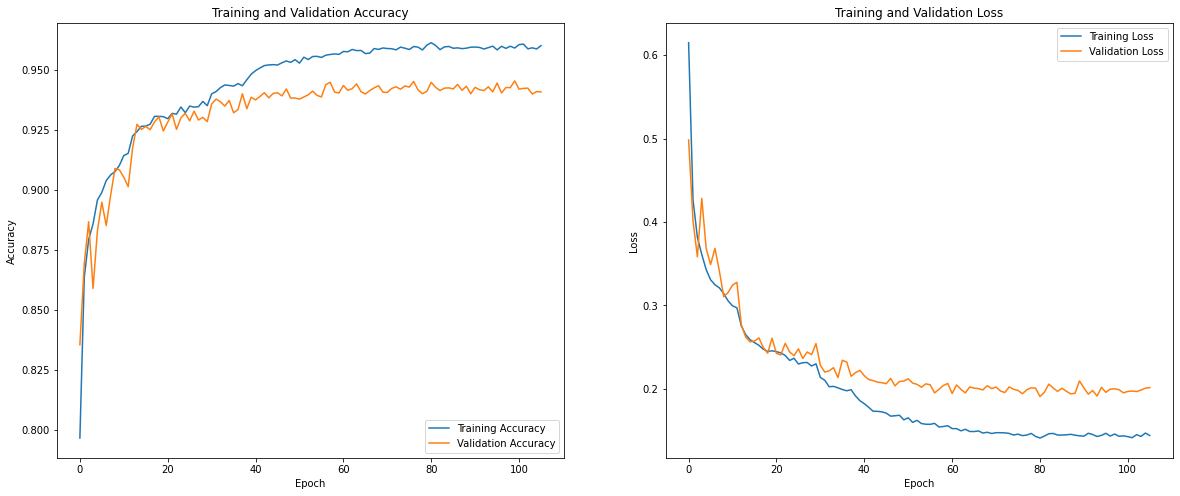

In [ ]:
plot_diagrams(history3, epochs=106)

In [ ]:
# Convert labels from one hot encoding to numbers
y_test = np.argmax(y_test, axis=-1) 
predicted_labels3 = model3.predict(X_test)
predicted_classes3 = np.argmax(predicted_labels3, axis=1)

313/313 [==============================] - 1s 3ms/step


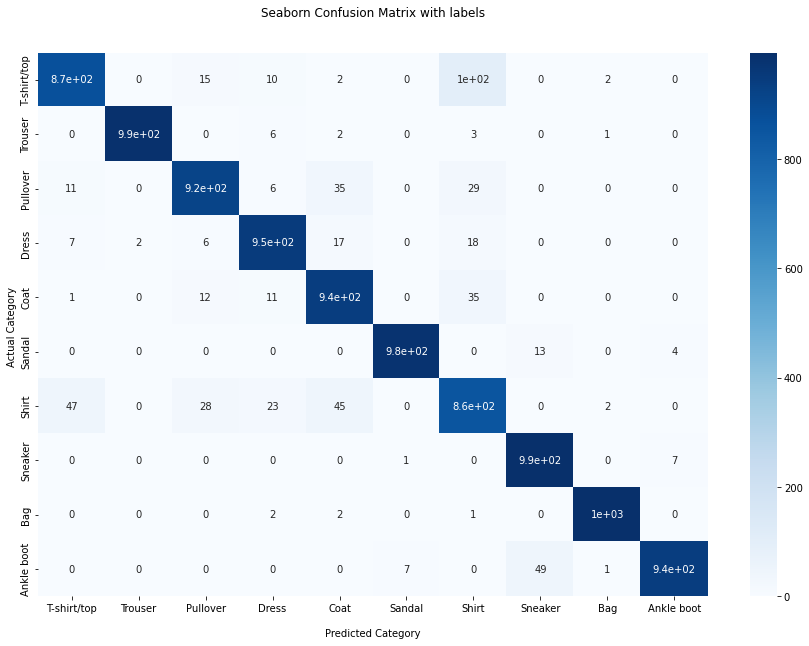

In [ ]:
plot_confusion_matrix(y_test, predicted_classes3)

## Results

In [ ]:
print("Training accuracy")
print("Model1: " + "{:.2f}".format(train_acc1*100) + "%")
print("Model2: " + "{:.2f}".format(train_acc2*100) + "%")
print("Model3: " + "{:.2f}".format(train_acc3*100) + "%")
print()

print("Testing accuracy")
print("Model1: " + "{:.2f}".format(test_acc1*100) + "%")
print("Model2: " + "{:.2f}".format(test_acc2*100) + "%")
print("Model3: " + "{:.2f}".format(test_acc3*100) + "%")

Training accuracy
Model1: 93.39%
Model2: 96.84%
Model3: 96.80%

Testing accuracy
Model1: 88.01%
Model2: 89.67%
Model3: 94.37%


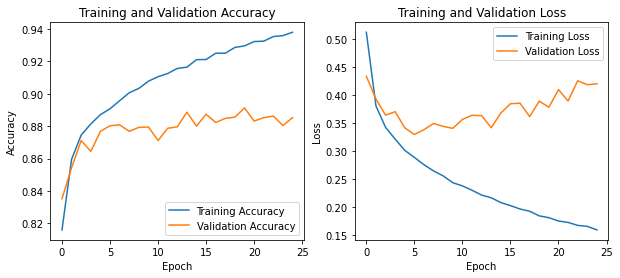

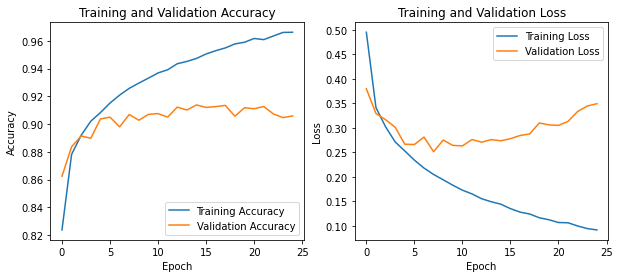

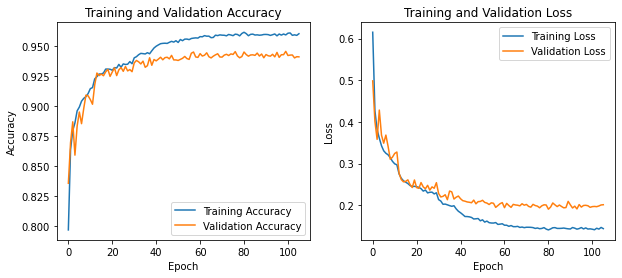

In [ ]:
# plot 1:
plot_diagrams(history1, h=10, w=4)

# plot 2:
plot_diagrams(history2, h=10, w=4)

# plot 3:
plot_diagrams(history3, epochs=106, h=10, w=4)

plt.show()

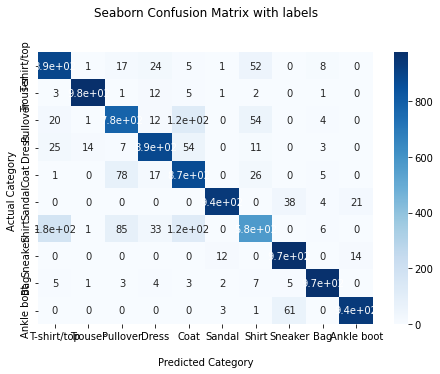

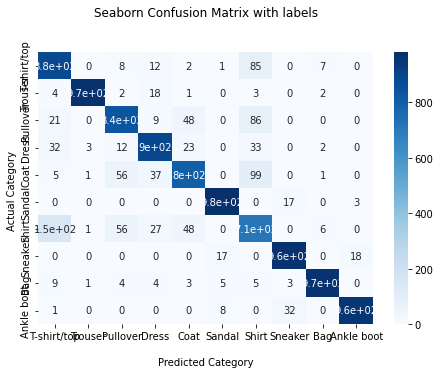

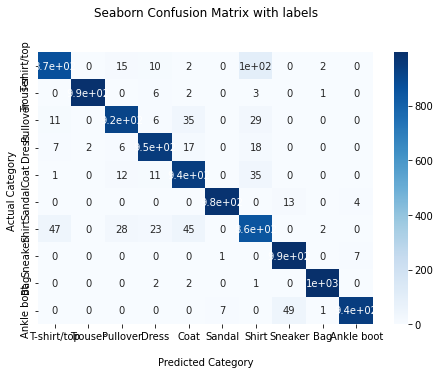

In [ ]:
# plot 1:
plot_confusion_matrix(y_test, predicted_classes1, h=7.5, w=5)

# plot 2:
plot_confusion_matrix(y_test, predicted_classes2, h=7.5, w=5)

# plot 3:
plot_confusion_matrix(y_test, predicted_classes3, h=7.5, w=5)

plt.show()

## Best model

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Fashion Mnist Best Model'
best_model = load_model(checkpoint_filepath)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255, X_test/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2014 - accuracy: 0.9437 - 1s/epoch - 5ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

Test accuracy: 94.37%


# Cifar-10

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.layer_utils import count_params
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(42500, 32, 32, 3)
(42500, 1)
(7500, 32, 32, 3)
(7500, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test, X_val = X_train/255, X_test/255, X_val/255
epochs = 25

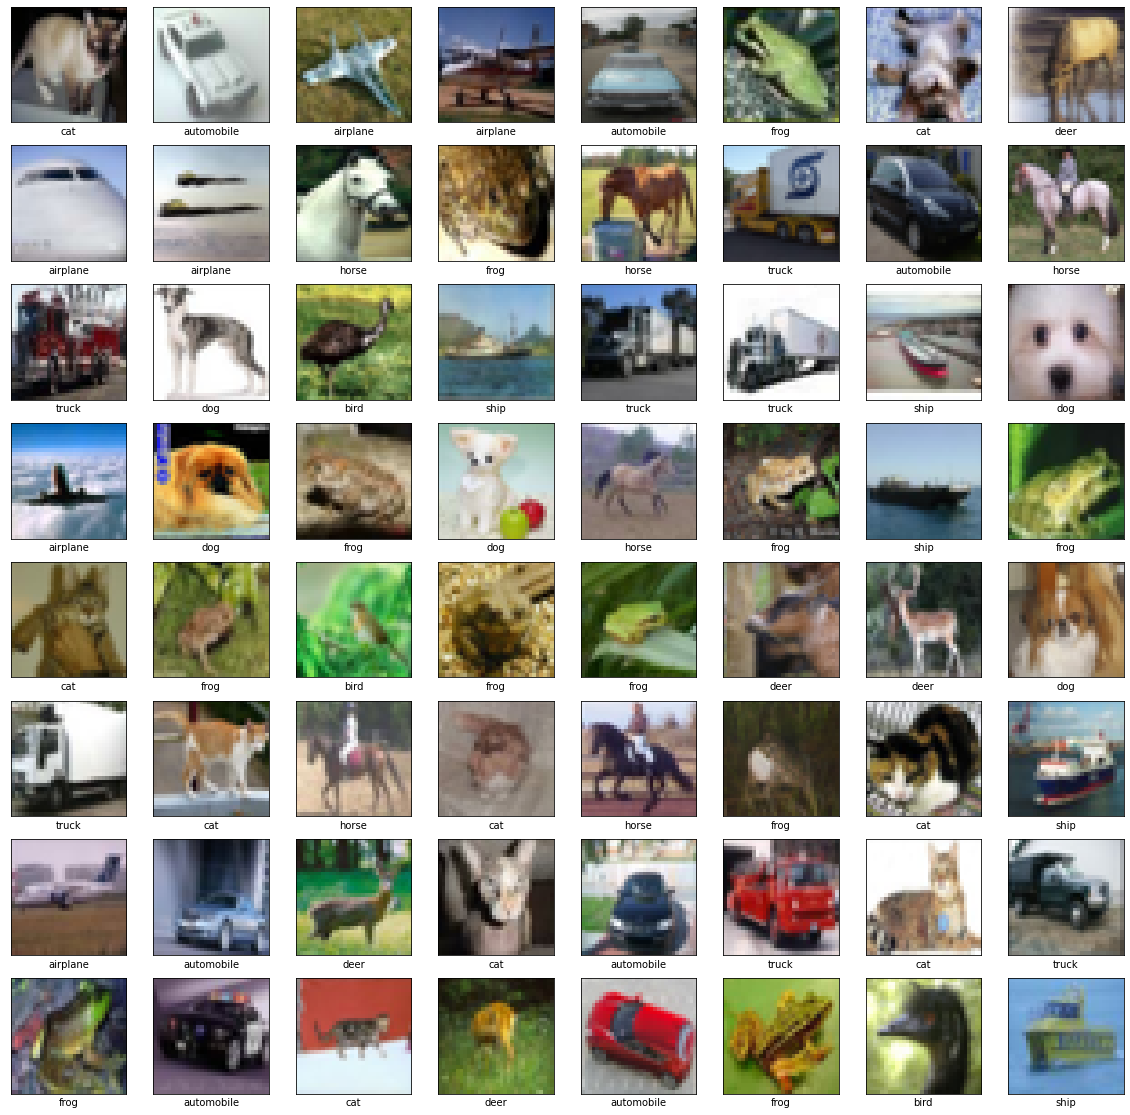

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 20))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
def plot_diagrams(history, epochs=epochs, h=20, w=8):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(h, w))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
def plot_confusion_matrix(y_test, y_pred, h=15, w=10):
    fig, ax = plt.subplots(figsize=(h, w))
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
    ax.yaxis.set_ticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

## Multilayer Perceptron (Fully Connected NN) με 3 κρυφά επίπεδα, 64, 128 και 256, και αρχικό και τελικό επίπεδο κατάλληλου μεγέθους.

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/25
1329/1329 [==============================] - 8s 4ms/step - loss: 1.8775 - accuracy: 0.3137 - val_loss: 1.7358 - val_accuracy: 0.3736
Epoch 2/25
1329/1329 [==============================] - 5s 4ms/step - loss: 1.7149 - accuracy: 0.3834 - val_loss: 1.6903 - val_accuracy: 0.3875
Epoch 3/25
1329/1329 [==============================] - 5s 4ms/step - loss: 1.6604 - accuracy: 0.4013 - val_loss: 1.6803 - val_accuracy: 0.4049
Epoch 4/25
1329/1329 [==============================] - 5s 3ms/step - loss: 1.6308 - accuracy: 0.4141 - val_loss: 1.6281 - val_accuracy: 0.4180
Epoch 5/25
1329/1329 [==============================] - 5s 4ms/step - loss: 1.5987 - accuracy: 0.4255 - val_loss: 1.6546 - val_accuracy: 0.4068
Epoch 6/25
1329/1329 [==============================] - 5s 3ms/step - loss: 1.5767 - accuracy: 0.4338 - val_loss: 1.6622 - val_accuracy: 0.4085
Epoch 7/25
1329/1329 [==============================] - 5s 3ms/step - loss: 1.5644 - accuracy: 0.4357 - val_loss: 1.6342 - val_accuracy:

In [ ]:
train_loss1, train_acc1 = model1.evaluate(X_train,  y_train, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc1*100) + "%")

1329/1329 - 3s - loss: 1.3859 - accuracy: 0.4939 - 3s/epoch - 3ms/step
Train accuracy: 49.39%


In [ ]:
test_loss1, test_acc1 = model1.evaluate(X_test,  y_test, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc1*100) + "%")

313/313 - 1s - loss: 1.6208 - accuracy: 0.4362 - 829ms/epoch - 3ms/step
Test accuracy: 43.62%


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                196672    
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 240,586
Trainable params: 240,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainable_params1 = count_params(model1.trainable_weights)
non_trainable_params1 = count_params(model1.non_trainable_weights)
print("Trainable params:", trainable_params1)
print("Non trainable params:", non_trainable_params1)

Trainable params: 240586
Non trainable params: 0


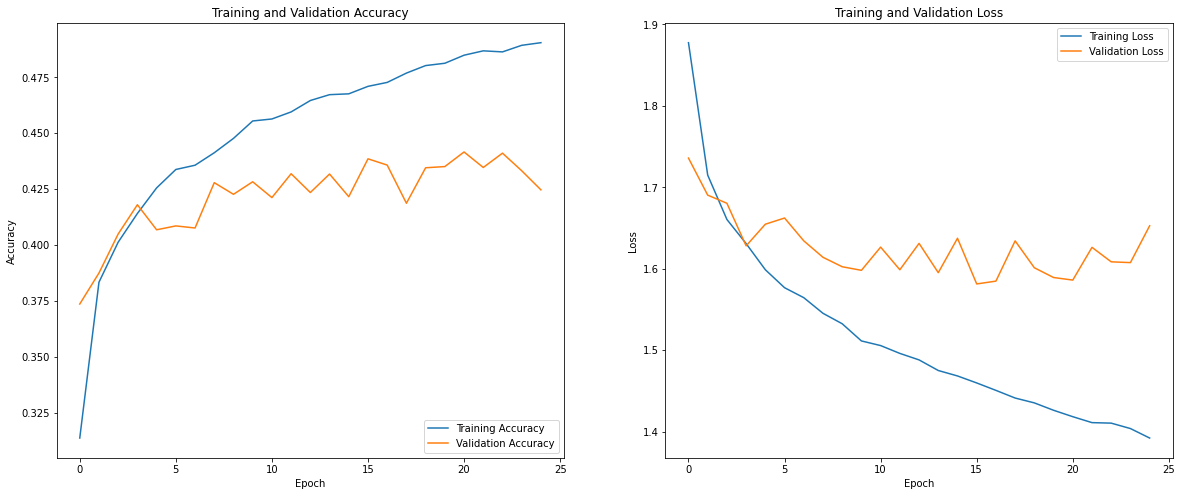

In [ ]:
plot_diagrams(history1)

313/313 [==============================] - 1s 2ms/step


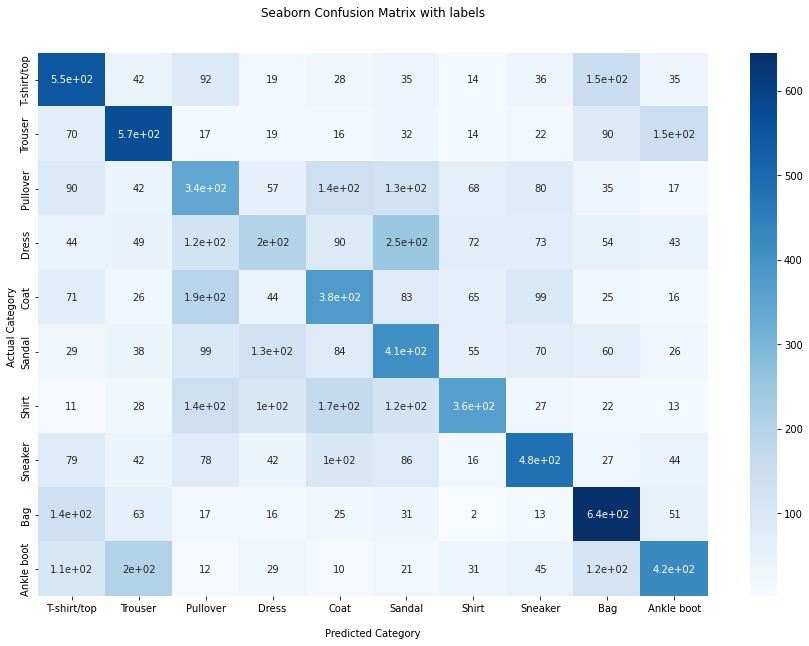

In [ ]:
predicted_labels1 = model1.predict(X_test)
predicted_classes1 = np.argmax(predicted_labels1, axis=1)
plot_confusion_matrix(y_test, predicted_classes1)

## CNN με 3 κρυφά επίπεδα με max pooling μετά απο κάθε ένα, με 32, 64 και 128 φίλτρα.


In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='linear')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/25
1329/1329 [==============================] - 16s 7ms/step - loss: 1.5343 - accuracy: 0.4426 - val_loss: 1.2724 - val_accuracy: 0.5579
Epoch 2/25
1329/1329 [==============================] - 9s 7ms/step - loss: 1.1732 - accuracy: 0.5880 - val_loss: 1.1685 - val_accuracy: 0.5833
Epoch 3/25
1329/1329 [==============================] - 9s 7ms/step - loss: 1.0192 - accuracy: 0.6461 - val_loss: 1.0575 - val_accuracy: 0.6367
Epoch 4/25
1329/1329 [==============================] - 7s 5ms/step - loss: 0.9183 - accuracy: 0.6826 - val_loss: 0.9410 - val_accuracy: 0.6720
Epoch 5/25
1329/1329 [==============================] - 8s 6ms/step - loss: 0.8444 - accuracy: 0.7086 - val_loss: 0.9097 - val_accuracy: 0.6859
Epoch 6/25
1329/1329 [==============================] - 9s 6ms/step - loss: 0.7826 - accuracy: 0.7302 - val_loss: 0.9217 - val_accuracy: 0.6869
Epoch 7/25
1329/1329 [==============================] - 6s 4ms/step - loss: 0.7322 - accuracy: 0.7448 - val_loss: 0.8669 - val_accuracy

In [ ]:
train_loss2, train_acc2 = model2.evaluate(X_train,  y_train, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc2*100) + "%")

1329/1329 - 3s - loss: 0.1680 - accuracy: 0.9433 - 3s/epoch - 2ms/step
Train accuracy: 94.33%


In [ ]:
test_loss2, test_acc2 = model2.evaluate(X_test,  y_test, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc2*100) + "%")

313/313 - 1s - loss: 1.3983 - accuracy: 0.6967 - 805ms/epoch - 3ms/step
Test accuracy: 69.67%


In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
trainable_params2 = count_params(model2.trainable_weights)
non_trainable_params2 = count_params(model2.non_trainable_weights)
print("Trainable params:", trainable_params2)
print("Non trainable params:", non_trainable_params2)

Trainable params: 98378
Non trainable params: 0


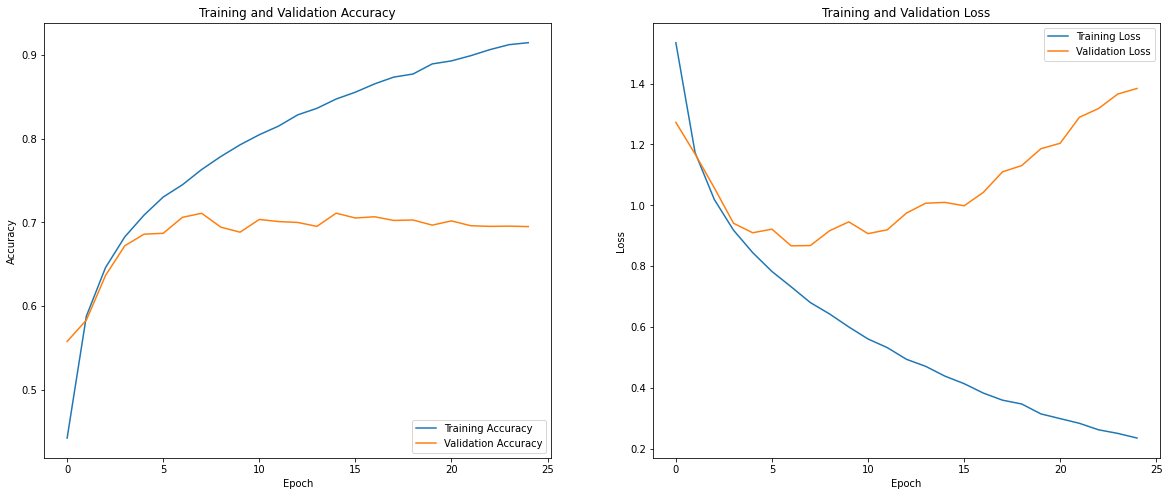

In [ ]:
plot_diagrams(history2)

313/313 [==============================] - 1s 2ms/step


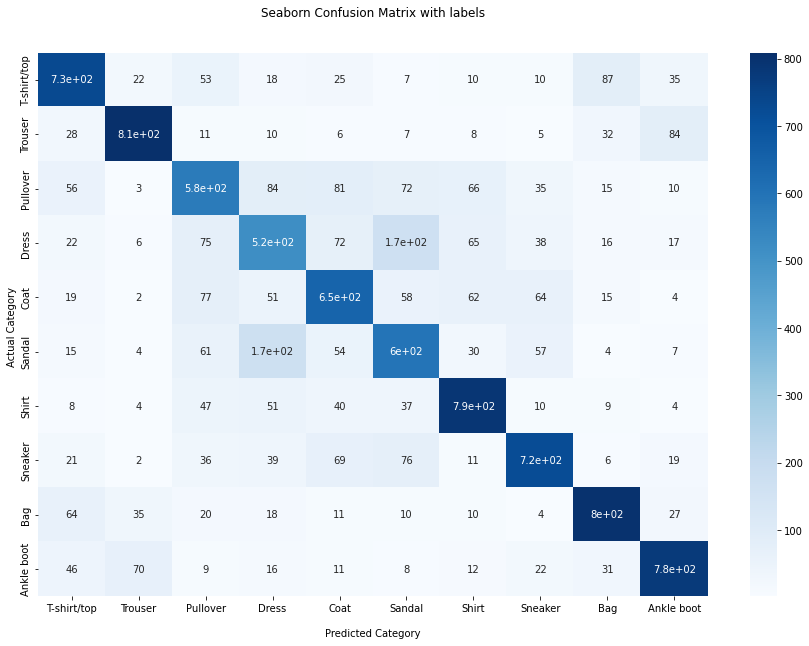

In [ ]:
predicted_labels2 = model2.predict(X_test)
predicted_classes2 = np.argmax(predicted_labels2, axis=1)
plot_confusion_matrix(y_test, predicted_classes2)

## Το νευρωνικό δικιάς σας έμπνευσης που θα στοχεύει σε μέγιστη ακρίβεια ή μέγιστο efficiency.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Cifar10 Best Model'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.55, patience=4, min_lr=1e-6)


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train/255, X_test/255

In [ ]:
batch_size = 32
epochs = 10
steps_per_epoch = int((X_train.shape[0] // batch_size)*0.85)
validation_steps = int((X_train.shape[0] // batch_size)*0.15)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.15, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.05
    )

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

def Mish(x):
   return x * tf.keras.backend.tanh(tf.keras.backend.softplus(x))

get_custom_objects().update({'Mish':Mish})

In [ ]:
from keras import regularizers

model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="Mish", input_shape=(32, 32, 3), padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="Mish", kernel_initializer='he_normal',
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(512, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(datagen.flow(X_train, y_train, batch_size=batch_size, subset='training'),
                        steps_per_epoch = steps_per_epoch,
                        validation_data=datagen.flow(X_train, y_train, batch_size=batch_size, subset='validation'),
                        validation_steps = validation_steps,
                        epochs=500, batch_size=batch_size, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/500
1325/1327 [============================>.] - ETA: 0s - loss: 2.7231 - accuracy: 0.3950

1327/1327 [==============================] - 54s 38ms/step - loss: 2.7220 - accuracy: 0.3952 - val_loss: 2.1017 - val_accuracy: 0.5353 - lr: 0.0010
Epoch 2/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.7660 - accuracy: 0.5776

1327/1327 [==============================] - 62s 47ms/step - loss: 1.7657 - accuracy: 0.5776 - val_loss: 1.6063 - val_accuracy: 0.5829 - lr: 0.0010
Epoch 3/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.3254 - accuracy: 0.6488

1327/1327 [==============================] - 60s 45ms/step - loss: 1.3257 - accuracy: 0.6487 - val_loss: 1.3046 - val_accuracy: 0.6398 - lr: 0.0010
Epoch 4/500
1327/1327 [==============================] - ETA: 0s - loss: 1.1585 - accuracy: 0.6882

1327/1327 [==============================] - 51s 38ms/step - loss: 1.1585 - accuracy: 0.6882 - val_loss: 1.0255 - val_accuracy: 0.7201 - lr: 0.0010
Epoch 5/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.0645 - accuracy: 0.7197

1327/1327 [==============================] - 55s 41ms/step - loss: 1.0643 - accuracy: 0.7197 - val_loss: 1.0107 - val_accuracy: 0.7318 - lr: 0.0010
Epoch 6/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.9923 - accuracy: 0.7412

1327/1327 [==============================] - 58s 44ms/step - loss: 0.9924 - accuracy: 0.7411 - val_loss: 0.9473 - val_accuracy: 0.7583 - lr: 0.0010
Epoch 7/500
1327/1327 [==============================] - 46s 35ms/step - loss: 0.9218 - accuracy: 0.7613 - val_loss: 0.9708 - val_accuracy: 0.7405 - lr: 0.0010
Epoch 8/500
1327/1327 [==============================] - ETA: 0s - loss: 0.8393 - accuracy: 0.7820

1327/1327 [==============================] - 51s 38ms/step - loss: 0.8393 - accuracy: 0.7820 - val_loss: 0.8552 - val_accuracy: 0.7716 - lr: 0.0010
Epoch 9/500
1327/1327 [==============================] - ETA: 0s - loss: 0.7824 - accuracy: 0.7955

1327/1327 [==============================] - 59s 45ms/step - loss: 0.7824 - accuracy: 0.7955 - val_loss: 0.7352 - val_accuracy: 0.7993 - lr: 0.0010
Epoch 10/500
1327/1327 [==============================] - ETA: 0s - loss: 0.7360 - accuracy: 0.8066

1327/1327 [==============================] - 66s 49ms/step - loss: 0.7360 - accuracy: 0.8066 - val_loss: 0.6681 - val_accuracy: 0.8210 - lr: 0.0010
Epoch 11/500
1327/1327 [==============================] - 45s 34ms/step - loss: 0.6808 - accuracy: 0.8142 - val_loss: 0.7210 - val_accuracy: 0.8026 - lr: 0.0010
Epoch 12/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.6381 - accuracy: 0.8253

1327/1327 [==============================] - 50s 37ms/step - loss: 0.6383 - accuracy: 0.8252 - val_loss: 0.6574 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 13/500
1327/1327 [==============================] - ETA: 0s - loss: 0.6126 - accuracy: 0.8302

1327/1327 [==============================] - 50s 37ms/step - loss: 0.6126 - accuracy: 0.8302 - val_loss: 0.6014 - val_accuracy: 0.8313 - lr: 0.0010
Epoch 14/500
1327/1327 [==============================] - ETA: 0s - loss: 0.5744 - accuracy: 0.8405

1327/1327 [==============================] - 51s 38ms/step - loss: 0.5744 - accuracy: 0.8405 - val_loss: 0.5672 - val_accuracy: 0.8377 - lr: 0.0010
Epoch 15/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.5473 - accuracy: 0.8490

1327/1327 [==============================] - 52s 39ms/step - loss: 0.5474 - accuracy: 0.8490 - val_loss: 0.5490 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 16/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.5272 - accuracy: 0.8527

1327/1327 [==============================] - 52s 39ms/step - loss: 0.5273 - accuracy: 0.8527 - val_loss: 0.5167 - val_accuracy: 0.8579 - lr: 0.0010
Epoch 17/500
1327/1327 [==============================] - 44s 33ms/step - loss: 0.5014 - accuracy: 0.8597 - val_loss: 0.5690 - val_accuracy: 0.8371 - lr: 0.0010
Epoch 18/500
1327/1327 [==============================] - ETA: 0s - loss: 0.4821 - accuracy: 0.8648

1327/1327 [==============================] - 50s 37ms/step - loss: 0.4821 - accuracy: 0.8648 - val_loss: 0.4967 - val_accuracy: 0.8584 - lr: 0.0010
Epoch 19/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.4667 - accuracy: 0.8702

1327/1327 [==============================] - 51s 38ms/step - loss: 0.4667 - accuracy: 0.8702 - val_loss: 0.4902 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 20/500
1327/1327 [==============================] - 40s 30ms/step - loss: 0.4496 - accuracy: 0.8729 - val_loss: 0.4927 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 21/500
1327/1327 [==============================] - ETA: 0s - loss: 0.4394 - accuracy: 0.8765

1327/1327 [==============================] - 47s 35ms/step - loss: 0.4394 - accuracy: 0.8765 - val_loss: 0.4517 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 22/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.4329 - accuracy: 0.8783 - val_loss: 0.4559 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 23/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.4138 - accuracy: 0.8847 - val_loss: 0.4544 - val_accuracy: 0.8646 - lr: 0.0010
Epoch 24/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.4118 - accuracy: 0.8840 - val_loss: 0.4756 - val_accuracy: 0.8671 - lr: 0.0010
Epoch 25/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.3936 - accuracy: 0.8898

1327/1327 [==============================] - 49s 37ms/step - loss: 0.3935 - accuracy: 0.8899 - val_loss: 0.4439 - val_accuracy: 0.8743 - lr: 0.0010
Epoch 26/500
1327/1327 [==============================] - ETA: 0s - loss: 0.3808 - accuracy: 0.8929

1327/1327 [==============================] - 50s 38ms/step - loss: 0.3808 - accuracy: 0.8929 - val_loss: 0.4371 - val_accuracy: 0.8755 - lr: 0.0010
Epoch 27/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.3744 - accuracy: 0.8966 - val_loss: 0.4407 - val_accuracy: 0.8730 - lr: 0.0010
Epoch 28/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.3653 - accuracy: 0.8984 - val_loss: 0.4463 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 29/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.3503 - accuracy: 0.9026

1327/1327 [==============================] - 47s 35ms/step - loss: 0.3504 - accuracy: 0.9026 - val_loss: 0.4316 - val_accuracy: 0.8783 - lr: 0.0010
Epoch 30/500
1327/1327 [==============================] - ETA: 0s - loss: 0.3583 - accuracy: 0.8998

1327/1327 [==============================] - 49s 37ms/step - loss: 0.3583 - accuracy: 0.8998 - val_loss: 0.4117 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 31/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.3401 - accuracy: 0.9044 - val_loss: 0.4175 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 32/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.3311 - accuracy: 0.9086 - val_loss: 0.5432 - val_accuracy: 0.8431 - lr: 0.0010
Epoch 33/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.3217 - accuracy: 0.9114 - val_loss: 0.4179 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 34/500
1327/1327 [==============================] - 41s 31ms/step - loss: 0.3091 - accuracy: 0.9126 - val_loss: 0.4269 - val_accuracy: 0.8813 - lr: 0.0010
Epoch 35/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.2655 - accuracy: 0.9256

1327/1327 [==============================] - 49s 37ms/step - loss: 0.2656 - accuracy: 0.9256 - val_loss: 0.3634 - val_accuracy: 0.8984 - lr: 5.5000e-04
Epoch 36/500
1327/1327 [==============================] - 41s 31ms/step - loss: 0.2464 - accuracy: 0.9316 - val_loss: 0.3717 - val_accuracy: 0.8970 - lr: 5.5000e-04
Epoch 37/500
1327/1327 [==============================] - 41s 31ms/step - loss: 0.2351 - accuracy: 0.9348 - val_loss: 0.3716 - val_accuracy: 0.8993 - lr: 5.5000e-04
Epoch 38/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.2265 - accuracy: 0.9374 - val_loss: 0.3793 - val_accuracy: 0.8941 - lr: 5.5000e-04
Epoch 39/500
1327/1327 [==============================] - ETA: 0s - loss: 0.2188 - accuracy: 0.9395

1327/1327 [==============================] - 48s 36ms/step - loss: 0.2188 - accuracy: 0.9395 - val_loss: 0.3484 - val_accuracy: 0.8989 - lr: 5.5000e-04
Epoch 40/500
1327/1327 [==============================] - 44s 33ms/step - loss: 0.2167 - accuracy: 0.9390 - val_loss: 0.3594 - val_accuracy: 0.9017 - lr: 5.5000e-04
Epoch 41/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.2081 - accuracy: 0.9419 - val_loss: 0.3518 - val_accuracy: 0.9000 - lr: 5.5000e-04
Epoch 42/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.2119 - accuracy: 0.9406 - val_loss: 0.3816 - val_accuracy: 0.8982 - lr: 5.5000e-04
Epoch 43/500
1327/1327 [==============================] - 41s 31ms/step - loss: 0.2025 - accuracy: 0.9443 - val_loss: 0.3794 - val_accuracy: 0.8962 - lr: 5.5000e-04
Epoch 44/500
1327/1327 [==============================] - 43s 32ms/step - loss: 0.1771 - accuracy: 0.9504 - val_loss: 0.3535 - val_accuracy: 0.9030 - lr: 3.0250e-04
Epoch 45/500
1326/1327 

1327/1327 [==============================] - 48s 36ms/step - loss: 0.1631 - accuracy: 0.9539 - val_loss: 0.3444 - val_accuracy: 0.9057 - lr: 3.0250e-04
Epoch 46/500
1327/1327 [==============================] - ETA: 0s - loss: 0.1608 - accuracy: 0.9548

1327/1327 [==============================] - 48s 36ms/step - loss: 0.1608 - accuracy: 0.9548 - val_loss: 0.3354 - val_accuracy: 0.9050 - lr: 3.0250e-04
Epoch 47/500
1327/1327 [==============================] - 41s 31ms/step - loss: 0.1578 - accuracy: 0.9557 - val_loss: 0.3458 - val_accuracy: 0.9058 - lr: 3.0250e-04
Epoch 48/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.1496 - accuracy: 0.9587 - val_loss: 0.3447 - val_accuracy: 0.9107 - lr: 3.0250e-04
Epoch 49/500
1327/1327 [==============================] - 43s 32ms/step - loss: 0.1472 - accuracy: 0.9595 - val_loss: 0.3386 - val_accuracy: 0.9096 - lr: 3.0250e-04
Epoch 50/500
1327/1327 [==============================] - 43s 32ms/step - loss: 0.1432 - accuracy: 0.9611 - val_loss: 0.3723 - val_accuracy: 0.9013 - lr: 3.0250e-04
Epoch 51/500
1327/1327 [==============================] - 45s 34ms/step - loss: 0.1328 - accuracy: 0.9628 - val_loss: 0.3389 - val_accuracy: 0.9087 - lr: 1.6638e-04
Epoch 52/500
1327/1327 

1327/1327 [==============================] - 50s 38ms/step - loss: 0.1267 - accuracy: 0.9652 - val_loss: 0.3277 - val_accuracy: 0.9115 - lr: 1.6638e-04
Epoch 53/500
1327/1327 [==============================] - 43s 33ms/step - loss: 0.1199 - accuracy: 0.9674 - val_loss: 0.3504 - val_accuracy: 0.9068 - lr: 1.6638e-04
Epoch 54/500
1327/1327 [==============================] - ETA: 0s - loss: 0.1215 - accuracy: 0.9668

1327/1327 [==============================] - 48s 36ms/step - loss: 0.1215 - accuracy: 0.9668 - val_loss: 0.3195 - val_accuracy: 0.9129 - lr: 1.6638e-04
Epoch 55/500
1327/1327 [==============================] - 44s 33ms/step - loss: 0.1216 - accuracy: 0.9663 - val_loss: 0.3305 - val_accuracy: 0.9144 - lr: 1.6638e-04
Epoch 56/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.1155 - accuracy: 0.9679 - val_loss: 0.3260 - val_accuracy: 0.9109 - lr: 1.6638e-04
Epoch 57/500
1327/1327 [==============================] - 43s 32ms/step - loss: 0.1116 - accuracy: 0.9696 - val_loss: 0.3383 - val_accuracy: 0.9141 - lr: 1.6638e-04
Epoch 58/500
1327/1327 [==============================] - 44s 33ms/step - loss: 0.1136 - accuracy: 0.9695 - val_loss: 0.3344 - val_accuracy: 0.9107 - lr: 1.6638e-04
Epoch 59/500
1327/1327 [==============================] - 43s 33ms/step - loss: 0.1064 - accuracy: 0.9702 - val_loss: 0.3275 - val_accuracy: 0.9171 - lr: 9.1506e-05
Epoch 60/500
1327/1327 

1327/1327 [==============================] - 51s 38ms/step - loss: 0.0969 - accuracy: 0.9725 - val_loss: 0.3173 - val_accuracy: 0.9171 - lr: 5.0328e-05
Epoch 67/500
1327/1327 [==============================] - 41s 31ms/step - loss: 0.0915 - accuracy: 0.9746 - val_loss: 0.3226 - val_accuracy: 0.9125 - lr: 5.0328e-05
Epoch 68/500
1327/1327 [==============================] - 41s 31ms/step - loss: 0.0920 - accuracy: 0.9748 - val_loss: 0.3284 - val_accuracy: 0.9115 - lr: 5.0328e-05
Epoch 69/500
1327/1327 [==============================] - 41s 31ms/step - loss: 0.0925 - accuracy: 0.9748 - val_loss: 0.3198 - val_accuracy: 0.9177 - lr: 5.0328e-05
Epoch 70/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.0879 - accuracy: 0.9756 - val_loss: 0.3308 - val_accuracy: 0.9189 - lr: 5.0328e-05
Epoch 71/500
1327/1327 [==============================] - 43s 32ms/step - loss: 0.0874 - accuracy: 0.9752 - val_loss: 0.3249 - val_accuracy: 0.9171 - lr: 2.7681e-05
Epoch 72/500
1327/1327 

1327/1327 [==============================] - 48s 36ms/step - loss: 0.0817 - accuracy: 0.9776 - val_loss: 0.3081 - val_accuracy: 0.9243 - lr: 2.5330e-06
Epoch 91/500
1327/1327 [==============================] - 44s 33ms/step - loss: 0.0818 - accuracy: 0.9772 - val_loss: 0.3187 - val_accuracy: 0.9153 - lr: 2.5330e-06
Epoch 92/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.0803 - accuracy: 0.9787 - val_loss: 0.3241 - val_accuracy: 0.9197 - lr: 2.5330e-06
Epoch 93/500
1327/1327 [==============================] - 42s 32ms/step - loss: 0.0825 - accuracy: 0.9771 - val_loss: 0.3295 - val_accuracy: 0.9180 - lr: 2.5330e-06
Epoch 94/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.0857 - accuracy: 0.9760 - val_loss: 0.3316 - val_accuracy: 0.9156 - lr: 2.5330e-06
Epoch 95/500
1327/1327 [==============================] - 42s 31ms/step - loss: 0.0802 - accuracy: 0.9778 - val_loss: 0.3193 - val_accuracy: 0.9213 - lr: 1.3931e-06
Epoch 96/500
1327/1327 

In [ ]:
train_loss3, train_acc3 = model3.evaluate(X_train,  y_train, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc3*100) + "%")

1563/1563 - 10s - loss: 0.0819 - accuracy: 0.9807 - 10s/epoch - 6ms/step
Train accuracy: 98.07%


In [ ]:
test_loss3, test_acc3 = model3.evaluate(X_test,  y_test, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc3*100) + "%")

313/313 - 2s - loss: 0.3386 - accuracy: 0.9163 - 2s/epoch - 6ms/step
Test accuracy: 91.63%


In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_52 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_53 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_54 (Bat  (None, 32, 32, 64)      

In [ ]:
trainable_params3 = count_params(model3.trainable_weights)
non_trainable_params3 = count_params(model3.non_trainable_weights)
print("Trainable params:", trainable_params3)
print("Non trainable params:", non_trainable_params3)

Trainable params: 5891306
Non trainable params: 7424


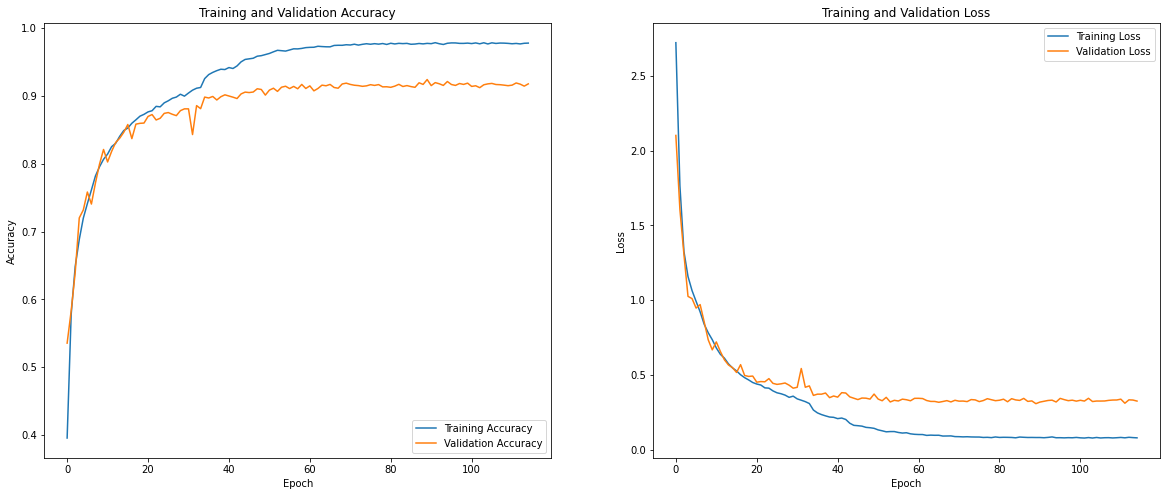

In [ ]:
plot_diagrams(history3, epochs=115)

In [ ]:
# Convert labels from one hot encoding to numbers
y_test = np.argmax(y_test, axis=-1) 
predicted_labels3 = model3.predict(X_test)
predicted_classes3 = np.argmax(predicted_labels3, axis=1)

313/313 [==============================] - 2s 6ms/step


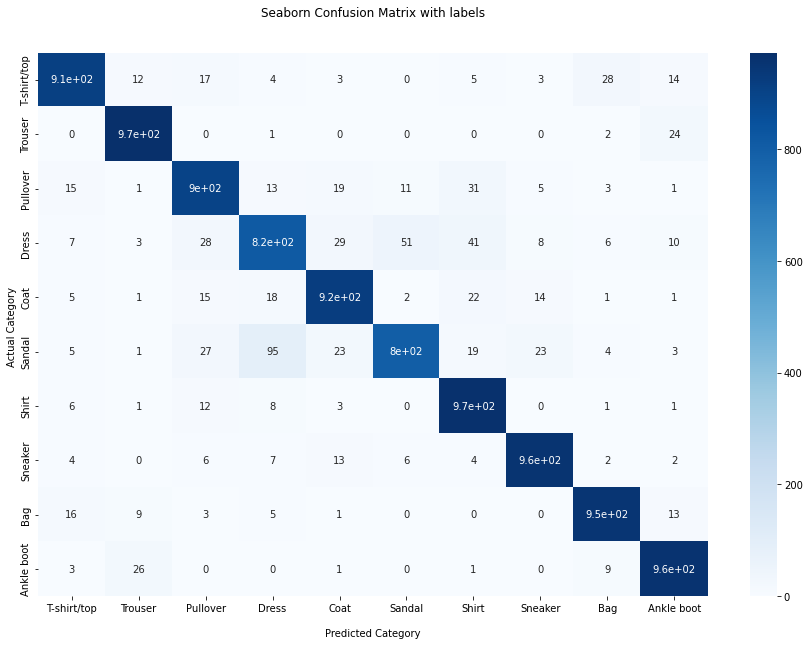

In [ ]:
plot_confusion_matrix(y_test, predicted_classes3)

## Results

In [ ]:
print("Training accuracy")
print("Model1: " + "{:.2f}".format(train_acc1*100) + "%")
print("Model2: " + "{:.2f}".format(train_acc2*100) + "%")
print("Model3: " + "{:.2f}".format(train_acc3*100) + "%")
print()

print("Testing accuracy")
print("Model1: " + "{:.2f}".format(test_acc1*100) + "%")
print("Model2: " + "{:.2f}".format(test_acc2*100) + "%")
print("Model3: " + "{:.2f}".format(test_acc3*100) + "%")

Training accuracy
Model1: 49.39%
Model2: 94.33%
Model3: 98.07%

Testing accuracy
Model1: 43.62%
Model2: 69.67%
Model3: 91.63%


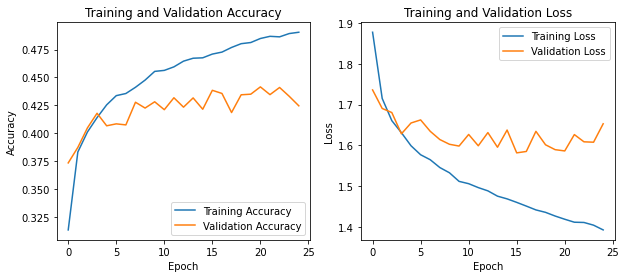

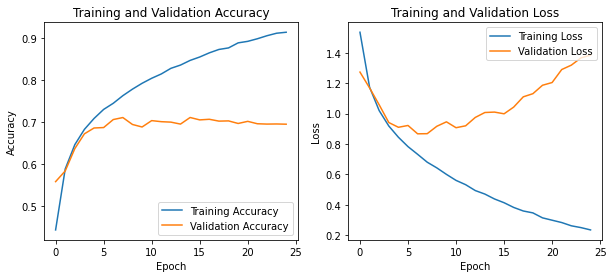

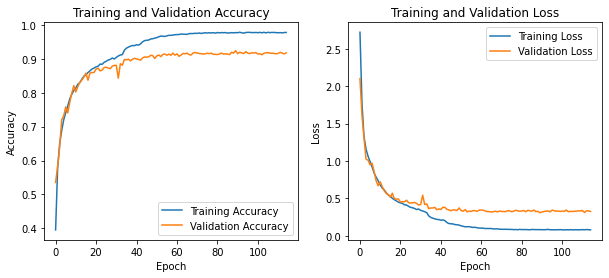

In [ ]:
# plot 1:
plot_diagrams(history1, h=10, w=4)

# plot 2:
plot_diagrams(history2, h=10, w=4)

# plot 3:
plot_diagrams(history3, epochs=115, h=10, w=4)

plt.show()

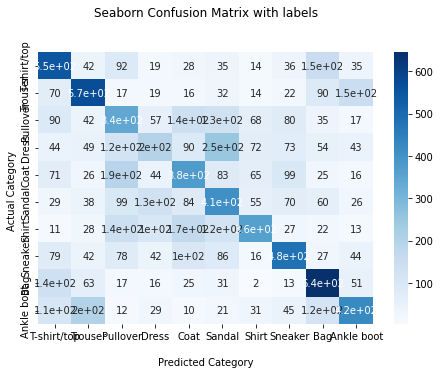

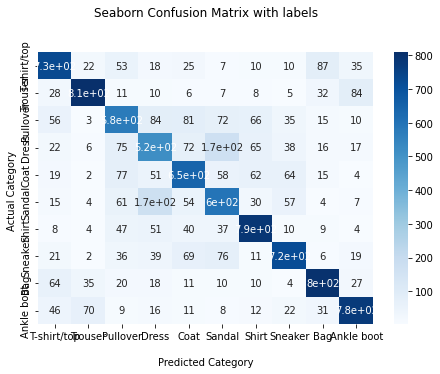

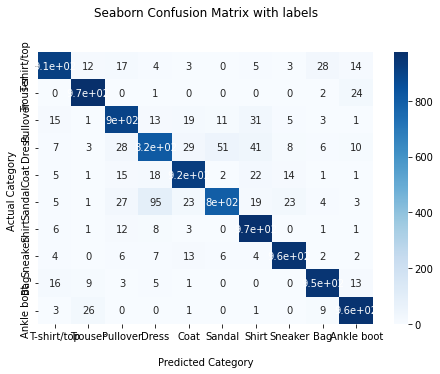

In [ ]:
# plot 1:
plot_confusion_matrix(y_test, predicted_classes1, h=7.5, w=5)

# plot 2:
plot_confusion_matrix(y_test, predicted_classes2, h=7.5, w=5)

# plot 3:
plot_confusion_matrix(y_test, predicted_classes3, h=7.5, w=5)

plt.show()

## Best model

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn 
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Cifar10 Best Model'
best_model = load_model(checkpoint_filepath)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255, X_test/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - loss: 0.3386 - accuracy: 0.9163 - 2s/epoch - 8ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

Test accuracy: 91.63%


# Cifar-100

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.layer_utils import count_params
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
(X1_train, y1_train), (X1_test, y1_test) = tf.keras.datasets.cifar100.load_data()
(X2_train, y2_train), (X2_test, y2_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.15, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
    )

In [ ]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print()
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print(y1_train)

[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]


In [ ]:
# Normalize pixel values to be between 0 and 1
X1_train, X1_test = X1_train/255, X1_test/255
X2_train, X2_test = X2_train/255, X2_test/255
epochs = 25
batch_size = 32
steps_per_epoch = int((X1_train.shape[0] // batch_size)*0.85)
validation_steps = int((X1_train.shape[0] // batch_size)*0.15)

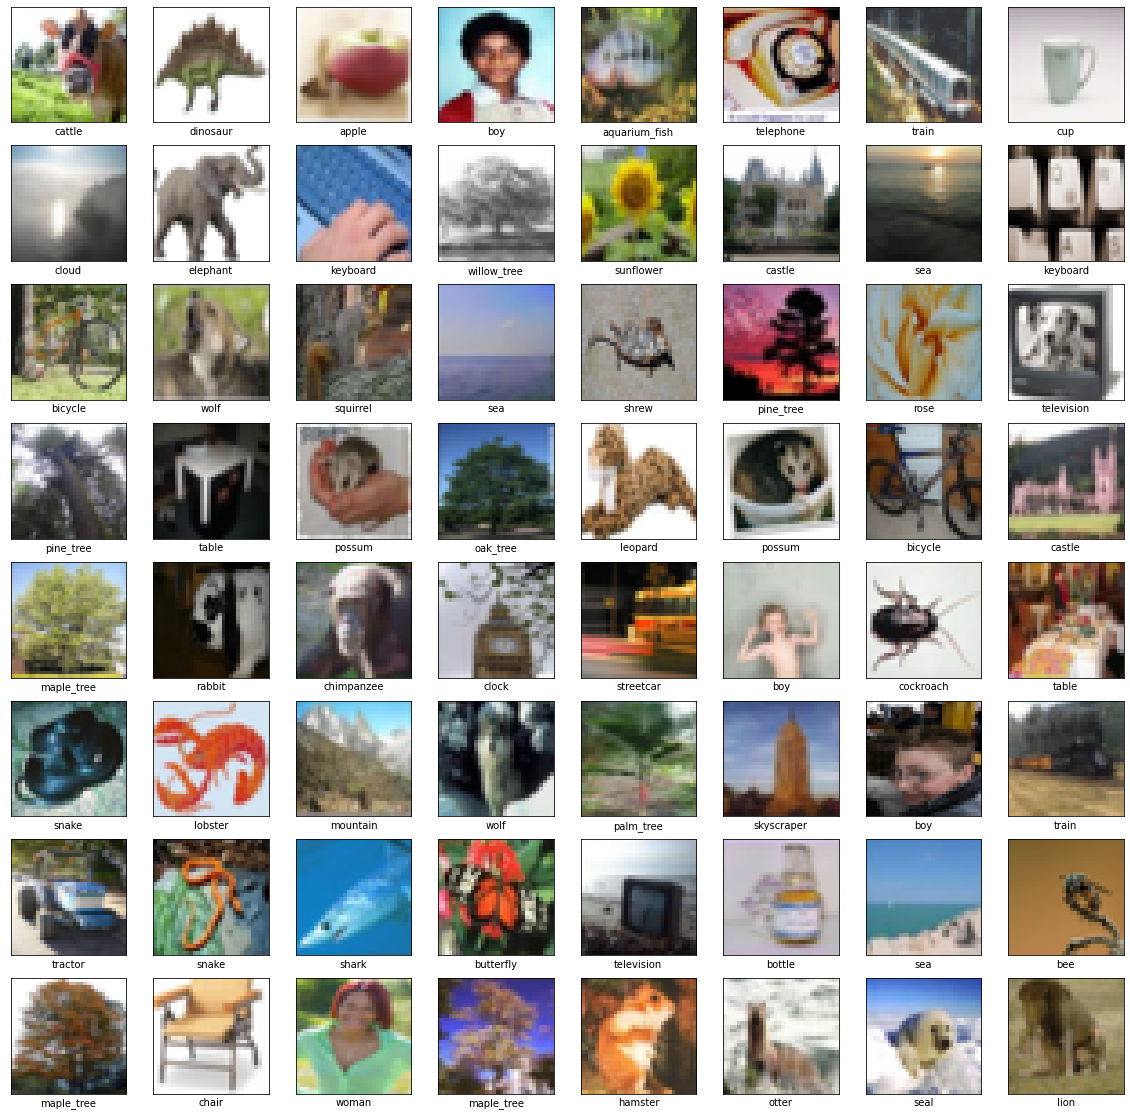

In [ ]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
               'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
               'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
               'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
               'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
               'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
               'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
               'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
               'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 
               'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

plt.figure(figsize=(20, 20))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X1_train[i])
    plt.xlabel(class_names[y1_train[i][0]])
plt.show()

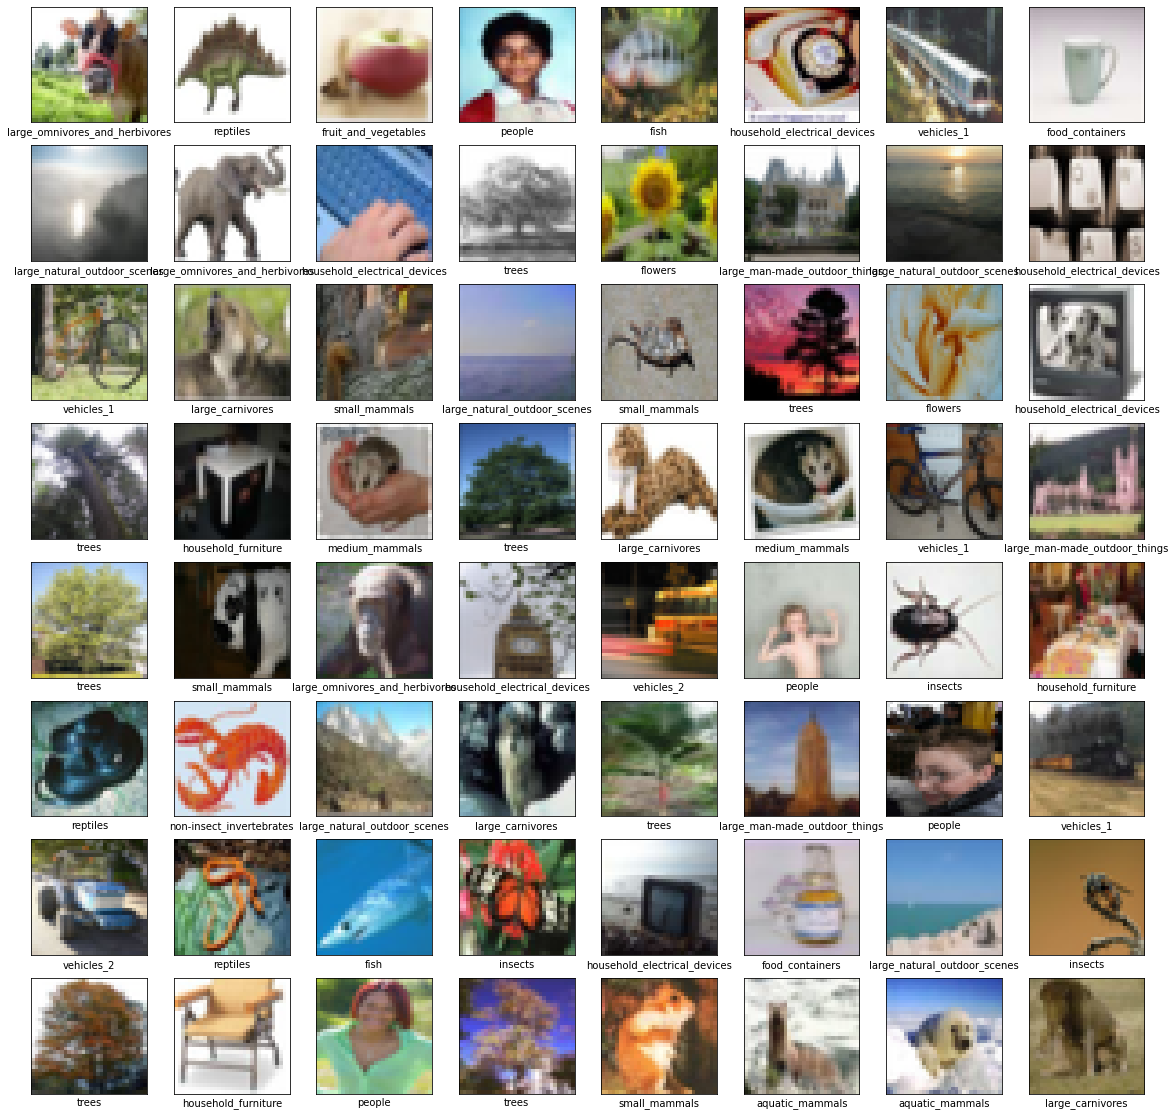

In [ ]:
superclass_names = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 
                    'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 
                    'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 
                    'trees', 'vehicles_1', 'vehicles_2']

plt.figure(figsize=(20, 20))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X2_train[i])
    plt.xlabel(superclass_names[y2_train[i][0]])
plt.show()

In [ ]:
y1_train = tf.keras.utils.to_categorical(y1_train, 100)
y1_test = tf.keras.utils.to_categorical(y1_test, 100)

y2_train = tf.keras.utils.to_categorical(y2_train, 20)
y2_test = tf.keras.utils.to_categorical(y2_test, 20)

In [ ]:
def plot_diagrams(history, epochs=epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
def plot_confusion_matrix(y_test, y_pred, classes, dpi=200):
    fig, ax = plt.subplots(figsize=(35, 35), dpi=dpi)
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(classes, rotation=90)
    ax.yaxis.set_ticklabels(classes, rotation=90)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

def Mish(x):
   return x * tf.keras.backend.tanh(tf.keras.backend.softplus(x))

get_custom_objects().update({'Mish':Mish})

## Το νευρωνικό δικιάς σας έμπνευσης που θα στοχεύει σε μέγιστη ακρίβεια ή μέγιστο efficiency.

### Model for 100 classes.

In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Cifar 100 Best Model1'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

In [ ]:
from keras import regularizers

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="Mish", padding="same", input_shape=(32, 32, 3), kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(100, activation='softmax')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(datagen.flow(X1_train, y1_train, batch_size=batch_size, subset='training'),
                        steps_per_epoch=steps_per_epoch,
                        validation_data=datagen.flow(X1_train, y1_train, batch_size=batch_size, subset='validation'),
                        validation_steps=validation_steps,
                        epochs=500, batch_size=batch_size, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/500
1326/1327 [============================>.] - ETA: 0s - loss: 5.2112 - accuracy: 0.0516

1327/1327 [==============================] - 75s 47ms/step - loss: 5.2110 - accuracy: 0.0516 - val_loss: 5.2284 - val_accuracy: 0.0541 - lr: 0.0010
Epoch 2/500
1326/1327 [============================>.] - ETA: 0s - loss: 4.4860 - accuracy: 0.0810

1327/1327 [==============================] - 59s 44ms/step - loss: 4.4859 - accuracy: 0.0810 - val_loss: 4.2745 - val_accuracy: 0.0828 - lr: 0.0010
Epoch 3/500
1326/1327 [============================>.] - ETA: 0s - loss: 4.0467 - accuracy: 0.1013

1327/1327 [==============================] - 57s 43ms/step - loss: 4.0465 - accuracy: 0.1014 - val_loss: 4.0034 - val_accuracy: 0.1019 - lr: 0.0010
Epoch 4/500
1327/1327 [==============================] - ETA: 0s - loss: 3.8520 - accuracy: 0.1139

1327/1327 [==============================] - 59s 45ms/step - loss: 3.8520 - accuracy: 0.1139 - val_loss: 3.8076 - val_accuracy: 0.1124 - lr: 0.0010
Epoch 5/500
1326/1327 [============================>.] - ETA: 0s - loss: 3.7071 - accuracy: 0.1331

1327/1327 [==============================] - 60s 45ms/step - loss: 3.7075 - accuracy: 0.1330 - val_loss: 3.6636 - val_accuracy: 0.1420 - lr: 0.0010
Epoch 6/500
1326/1327 [============================>.] - ETA: 0s - loss: 3.5818 - accuracy: 0.1521

1327/1327 [==============================] - 60s 45ms/step - loss: 3.5818 - accuracy: 0.1522 - val_loss: 3.6174 - val_accuracy: 0.1599 - lr: 0.0010
Epoch 7/500
1327/1327 [==============================] - ETA: 0s - loss: 3.4668 - accuracy: 0.1732

1327/1327 [==============================] - 60s 45ms/step - loss: 3.4668 - accuracy: 0.1732 - val_loss: 3.3556 - val_accuracy: 0.1948 - lr: 0.0010
Epoch 8/500
1326/1327 [============================>.] - ETA: 0s - loss: 3.3696 - accuracy: 0.1935

1327/1327 [==============================] - 59s 45ms/step - loss: 3.3695 - accuracy: 0.1935 - val_loss: 3.2283 - val_accuracy: 0.2146 - lr: 0.0010
Epoch 9/500
1327/1327 [==============================] - ETA: 0s - loss: 3.2585 - accuracy: 0.2125

1327/1327 [==============================] - 59s 44ms/step - loss: 3.2585 - accuracy: 0.2125 - val_loss: 3.1424 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 10/500
1327/1327 [==============================] - ETA: 0s - loss: 3.1642 - accuracy: 0.2291

1327/1327 [==============================] - 59s 44ms/step - loss: 3.1642 - accuracy: 0.2291 - val_loss: 3.0137 - val_accuracy: 0.2580 - lr: 0.0010
Epoch 11/500
1326/1327 [============================>.] - ETA: 0s - loss: 3.0913 - accuracy: 0.2435

1327/1327 [==============================] - 59s 45ms/step - loss: 3.0910 - accuracy: 0.2435 - val_loss: 2.9397 - val_accuracy: 0.2759 - lr: 0.0010
Epoch 12/500
1326/1327 [============================>.] - ETA: 0s - loss: 3.0059 - accuracy: 0.2614

1327/1327 [==============================] - 58s 44ms/step - loss: 3.0060 - accuracy: 0.2614 - val_loss: 2.8591 - val_accuracy: 0.2893 - lr: 0.0010
Epoch 13/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.9402 - accuracy: 0.2706

1327/1327 [==============================] - 58s 44ms/step - loss: 2.9402 - accuracy: 0.2706 - val_loss: 2.8488 - val_accuracy: 0.2853 - lr: 0.0010
Epoch 14/500
1327/1327 [==============================] - ETA: 0s - loss: 2.8821 - accuracy: 0.2878

1327/1327 [==============================] - 60s 45ms/step - loss: 2.8821 - accuracy: 0.2878 - val_loss: 2.7284 - val_accuracy: 0.3165 - lr: 0.0010
Epoch 15/500
1327/1327 [==============================] - 49s 37ms/step - loss: 2.8383 - accuracy: 0.2955 - val_loss: 2.7648 - val_accuracy: 0.3196 - lr: 0.0010
Epoch 16/500
1327/1327 [==============================] - 49s 37ms/step - loss: 2.7834 - accuracy: 0.3054 - val_loss: 2.9031 - val_accuracy: 0.2934 - lr: 0.0010
Epoch 17/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.7475 - accuracy: 0.3111

1327/1327 [==============================] - 59s 44ms/step - loss: 2.7476 - accuracy: 0.3111 - val_loss: 2.6353 - val_accuracy: 0.3442 - lr: 0.0010
Epoch 18/500
1327/1327 [==============================] - ETA: 0s - loss: 2.6930 - accuracy: 0.3268

1327/1327 [==============================] - 58s 43ms/step - loss: 2.6930 - accuracy: 0.3268 - val_loss: 2.5779 - val_accuracy: 0.3610 - lr: 0.0010
Epoch 19/500
1327/1327 [==============================] - 49s 37ms/step - loss: 2.6595 - accuracy: 0.3320 - val_loss: 2.6090 - val_accuracy: 0.3546 - lr: 0.0010
Epoch 20/500
1327/1327 [==============================] - ETA: 0s - loss: 2.6275 - accuracy: 0.3440

1327/1327 [==============================] - 59s 45ms/step - loss: 2.6275 - accuracy: 0.3440 - val_loss: 2.5731 - val_accuracy: 0.3586 - lr: 0.0010
Epoch 21/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.5723 - accuracy: 0.3530

1327/1327 [==============================] - 57s 43ms/step - loss: 2.5722 - accuracy: 0.3530 - val_loss: 2.4508 - val_accuracy: 0.3759 - lr: 0.0010
Epoch 22/500
1327/1327 [==============================] - 49s 37ms/step - loss: 2.5404 - accuracy: 0.3636 - val_loss: 2.4763 - val_accuracy: 0.3753 - lr: 0.0010
Epoch 23/500
1327/1327 [==============================] - 51s 38ms/step - loss: 2.4906 - accuracy: 0.3726 - val_loss: 2.5117 - val_accuracy: 0.3727 - lr: 0.0010
Epoch 24/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.4347 - accuracy: 0.3877

1327/1327 [==============================] - 58s 44ms/step - loss: 2.4346 - accuracy: 0.3876 - val_loss: 2.4029 - val_accuracy: 0.3932 - lr: 0.0010
Epoch 25/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.4147 - accuracy: 0.3947

1327/1327 [==============================] - 58s 44ms/step - loss: 2.4143 - accuracy: 0.3948 - val_loss: 2.3726 - val_accuracy: 0.4050 - lr: 0.0010
Epoch 26/500
1327/1327 [==============================] - ETA: 0s - loss: 2.3596 - accuracy: 0.4044

1327/1327 [==============================] - 59s 44ms/step - loss: 2.3596 - accuracy: 0.4044 - val_loss: 2.3629 - val_accuracy: 0.4125 - lr: 0.0010
Epoch 27/500
1327/1327 [==============================] - ETA: 0s - loss: 2.3225 - accuracy: 0.4144

1327/1327 [==============================] - 57s 43ms/step - loss: 2.3225 - accuracy: 0.4144 - val_loss: 2.3093 - val_accuracy: 0.4169 - lr: 0.0010
Epoch 28/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.3004 - accuracy: 0.4227

1327/1327 [==============================] - 59s 45ms/step - loss: 2.3004 - accuracy: 0.4227 - val_loss: 2.2382 - val_accuracy: 0.4380 - lr: 0.0010
Epoch 29/500
1327/1327 [==============================] - 49s 37ms/step - loss: 2.2596 - accuracy: 0.4333 - val_loss: 2.2918 - val_accuracy: 0.4408 - lr: 0.0010
Epoch 30/500
1327/1327 [==============================] - 49s 37ms/step - loss: 2.2402 - accuracy: 0.4363 - val_loss: 2.2543 - val_accuracy: 0.4420 - lr: 0.0010
Epoch 31/500
1327/1327 [==============================] - 52s 39ms/step - loss: 2.2067 - accuracy: 0.4473 - val_loss: 2.2930 - val_accuracy: 0.4351 - lr: 0.0010
Epoch 32/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.1694 - accuracy: 0.4533

1327/1327 [==============================] - 58s 44ms/step - loss: 2.1696 - accuracy: 0.4532 - val_loss: 2.2267 - val_accuracy: 0.4519 - lr: 0.0010
Epoch 33/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.1628 - accuracy: 0.4602

1327/1327 [==============================] - 58s 44ms/step - loss: 2.1626 - accuracy: 0.4603 - val_loss: 2.1937 - val_accuracy: 0.4569 - lr: 0.0010
Epoch 34/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.1176 - accuracy: 0.4732

1327/1327 [==============================] - 59s 45ms/step - loss: 2.1181 - accuracy: 0.4731 - val_loss: 2.0699 - val_accuracy: 0.4899 - lr: 0.0010
Epoch 35/500
1327/1327 [==============================] - 49s 37ms/step - loss: 2.0892 - accuracy: 0.4777 - val_loss: 2.1184 - val_accuracy: 0.4753 - lr: 0.0010
Epoch 36/500
1327/1327 [==============================] - 50s 37ms/step - loss: 2.0940 - accuracy: 0.4793 - val_loss: 2.1900 - val_accuracy: 0.4701 - lr: 0.0010
Epoch 37/500
1327/1327 [==============================] - 48s 36ms/step - loss: 2.0423 - accuracy: 0.4882 - val_loss: 2.1598 - val_accuracy: 0.4725 - lr: 0.0010
Epoch 38/500
1327/1327 [==============================] - 49s 37ms/step - loss: 2.0085 - accuracy: 0.5014 - val_loss: 2.1223 - val_accuracy: 0.4834 - lr: 0.0010
Epoch 39/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.8589 - accuracy: 0.5326

1327/1327 [==============================] - 59s 45ms/step - loss: 1.8588 - accuracy: 0.5326 - val_loss: 1.9195 - val_accuracy: 0.5211 - lr: 5.0000e-04
Epoch 40/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.8110 - accuracy: 0.5424

1327/1327 [==============================] - 58s 44ms/step - loss: 1.8109 - accuracy: 0.5424 - val_loss: 1.8904 - val_accuracy: 0.5304 - lr: 5.0000e-04
Epoch 41/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.7844 - accuracy: 0.5481 - val_loss: 1.9278 - val_accuracy: 0.5263 - lr: 5.0000e-04
Epoch 42/500
1327/1327 [==============================] - ETA: 0s - loss: 1.7352 - accuracy: 0.5559

1327/1327 [==============================] - 59s 44ms/step - loss: 1.7352 - accuracy: 0.5559 - val_loss: 1.8526 - val_accuracy: 0.5371 - lr: 5.0000e-04
Epoch 43/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.7190 - accuracy: 0.5627 - val_loss: 1.8775 - val_accuracy: 0.5361 - lr: 5.0000e-04
Epoch 44/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.6981 - accuracy: 0.5675 - val_loss: 1.8923 - val_accuracy: 0.5311 - lr: 5.0000e-04
Epoch 45/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.6817 - accuracy: 0.5687

1327/1327 [==============================] - 64s 49ms/step - loss: 1.6822 - accuracy: 0.5686 - val_loss: 1.8501 - val_accuracy: 0.5447 - lr: 5.0000e-04
Epoch 46/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.6586 - accuracy: 0.5761

1327/1327 [==============================] - 59s 44ms/step - loss: 1.6589 - accuracy: 0.5760 - val_loss: 1.8492 - val_accuracy: 0.5431 - lr: 5.0000e-04
Epoch 47/500
1327/1327 [==============================] - 51s 39ms/step - loss: 1.6409 - accuracy: 0.5817 - val_loss: 1.8586 - val_accuracy: 0.5494 - lr: 5.0000e-04
Epoch 48/500
1327/1327 [==============================] - 51s 38ms/step - loss: 1.6212 - accuracy: 0.5866 - val_loss: 1.8666 - val_accuracy: 0.5454 - lr: 5.0000e-04
Epoch 49/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.6040 - accuracy: 0.5860

1327/1327 [==============================] - 58s 43ms/step - loss: 1.6036 - accuracy: 0.5861 - val_loss: 1.8449 - val_accuracy: 0.5565 - lr: 5.0000e-04
Epoch 50/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.5962 - accuracy: 0.5936

1327/1327 [==============================] - 60s 45ms/step - loss: 1.5963 - accuracy: 0.5936 - val_loss: 1.8135 - val_accuracy: 0.5606 - lr: 5.0000e-04
Epoch 51/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.5737 - accuracy: 0.5979 - val_loss: 1.8318 - val_accuracy: 0.5513 - lr: 5.0000e-04
Epoch 52/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.5588 - accuracy: 0.6012

1327/1327 [==============================] - 57s 43ms/step - loss: 1.5589 - accuracy: 0.6012 - val_loss: 1.7984 - val_accuracy: 0.5608 - lr: 5.0000e-04
Epoch 53/500
1327/1327 [==============================] - 51s 38ms/step - loss: 1.5485 - accuracy: 0.6056 - val_loss: 1.8207 - val_accuracy: 0.5581 - lr: 5.0000e-04
Epoch 54/500
1327/1327 [==============================] - 51s 38ms/step - loss: 1.5155 - accuracy: 0.6118 - val_loss: 1.8121 - val_accuracy: 0.5590 - lr: 5.0000e-04
Epoch 55/500
1327/1327 [==============================] - 50s 37ms/step - loss: 1.5085 - accuracy: 0.6135 - val_loss: 1.8141 - val_accuracy: 0.5581 - lr: 5.0000e-04
Epoch 56/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.5229 - accuracy: 0.6100 - val_loss: 1.8038 - val_accuracy: 0.5700 - lr: 5.0000e-04
Epoch 57/500
1327/1327 [==============================] - ETA: 0s - loss: 1.4215 - accuracy: 0.6335

1327/1327 [==============================] - 60s 46ms/step - loss: 1.4215 - accuracy: 0.6335 - val_loss: 1.7375 - val_accuracy: 0.5800 - lr: 2.5000e-04
Epoch 58/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.3793 - accuracy: 0.6437 - val_loss: 1.7487 - val_accuracy: 0.5729 - lr: 2.5000e-04
Epoch 59/500
1327/1327 [==============================] - ETA: 0s - loss: 1.3678 - accuracy: 0.6455

1327/1327 [==============================] - 59s 44ms/step - loss: 1.3678 - accuracy: 0.6455 - val_loss: 1.7080 - val_accuracy: 0.5824 - lr: 2.5000e-04
Epoch 60/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.3484 - accuracy: 0.6520 - val_loss: 1.7112 - val_accuracy: 0.5836 - lr: 2.5000e-04
Epoch 61/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.3443 - accuracy: 0.6502 - val_loss: 1.7180 - val_accuracy: 0.5832 - lr: 2.5000e-04
Epoch 62/500
1327/1327 [==============================] - 50s 38ms/step - loss: 1.3287 - accuracy: 0.6515 - val_loss: 1.7227 - val_accuracy: 0.5748 - lr: 2.5000e-04
Epoch 63/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.3040 - accuracy: 0.6579 - val_loss: 1.7501 - val_accuracy: 0.5823 - lr: 2.5000e-04
Epoch 64/500
1327/1327 [==============================] - ETA: 0s - loss: 1.2787 - accuracy: 0.6659

1327/1327 [==============================] - 58s 44ms/step - loss: 1.2787 - accuracy: 0.6659 - val_loss: 1.6762 - val_accuracy: 0.5912 - lr: 1.2500e-04
Epoch 65/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.2603 - accuracy: 0.6699 - val_loss: 1.6826 - val_accuracy: 0.5869 - lr: 1.2500e-04
Epoch 66/500
1327/1327 [==============================] - 50s 37ms/step - loss: 1.2482 - accuracy: 0.6712 - val_loss: 1.6944 - val_accuracy: 0.5865 - lr: 1.2500e-04
Epoch 67/500
1327/1327 [==============================] - 51s 39ms/step - loss: 1.2318 - accuracy: 0.6742 - val_loss: 1.6835 - val_accuracy: 0.5865 - lr: 1.2500e-04
Epoch 68/500
1327/1327 [==============================] - 50s 37ms/step - loss: 1.2244 - accuracy: 0.6754 - val_loss: 1.6838 - val_accuracy: 0.5899 - lr: 1.2500e-04
Epoch 69/500
1327/1327 [==============================] - ETA: 0s - loss: 1.2017 - accuracy: 0.6818

1327/1327 [==============================] - 58s 43ms/step - loss: 1.2017 - accuracy: 0.6818 - val_loss: 1.6656 - val_accuracy: 0.5964 - lr: 6.2500e-05
Epoch 70/500
1327/1327 [==============================] - ETA: 0s - loss: 1.1905 - accuracy: 0.6859

1327/1327 [==============================] - 58s 44ms/step - loss: 1.1905 - accuracy: 0.6859 - val_loss: 1.6650 - val_accuracy: 0.5927 - lr: 6.2500e-05
Epoch 71/500
1327/1327 [==============================] - ETA: 0s - loss: 1.1898 - accuracy: 0.6867

1327/1327 [==============================] - 57s 43ms/step - loss: 1.1898 - accuracy: 0.6867 - val_loss: 1.6557 - val_accuracy: 0.5924 - lr: 6.2500e-05
Epoch 72/500
1327/1327 [==============================] - ETA: 0s - loss: 1.1852 - accuracy: 0.6862

1327/1327 [==============================] - 59s 44ms/step - loss: 1.1852 - accuracy: 0.6862 - val_loss: 1.6551 - val_accuracy: 0.5954 - lr: 6.2500e-05
Epoch 73/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.1671 - accuracy: 0.6909

1327/1327 [==============================] - 57s 43ms/step - loss: 1.1669 - accuracy: 0.6909 - val_loss: 1.6457 - val_accuracy: 0.5995 - lr: 6.2500e-05
Epoch 74/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1770 - accuracy: 0.6848 - val_loss: 1.6684 - val_accuracy: 0.5904 - lr: 6.2500e-05
Epoch 75/500
1327/1327 [==============================] - 50s 38ms/step - loss: 1.1709 - accuracy: 0.6871 - val_loss: 1.6544 - val_accuracy: 0.5972 - lr: 6.2500e-05
Epoch 76/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.1653 - accuracy: 0.6884 - val_loss: 1.6497 - val_accuracy: 0.5933 - lr: 6.2500e-05
Epoch 77/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.1594 - accuracy: 0.6890 - val_loss: 1.6662 - val_accuracy: 0.5966 - lr: 6.2500e-05
Epoch 78/500
1327/1327 [==============================] - 48s 37ms/step - loss: 1.1437 - accuracy: 0.6937 - val_loss: 1.6759 - val_accuracy: 0.5911 - lr: 3.1250e-05
Epoch 79/500
1327/1327 

1327/1327 [==============================] - 57s 43ms/step - loss: 1.1354 - accuracy: 0.6933 - val_loss: 1.6374 - val_accuracy: 0.5979 - lr: 3.1250e-05
Epoch 82/500
1327/1327 [==============================] - 51s 38ms/step - loss: 1.1316 - accuracy: 0.6955 - val_loss: 1.6615 - val_accuracy: 0.5976 - lr: 3.1250e-05
Epoch 83/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1259 - accuracy: 0.6962 - val_loss: 1.6580 - val_accuracy: 0.5992 - lr: 3.1250e-05
Epoch 84/500
1327/1327 [==============================] - 50s 37ms/step - loss: 1.1344 - accuracy: 0.6975 - val_loss: 1.6450 - val_accuracy: 0.6000 - lr: 3.1250e-05
Epoch 85/500
1327/1327 [==============================] - 51s 38ms/step - loss: 1.1232 - accuracy: 0.7005 - val_loss: 1.6529 - val_accuracy: 0.5995 - lr: 3.1250e-05
Epoch 86/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1171 - accuracy: 0.6984 - val_loss: 1.6569 - val_accuracy: 0.5955 - lr: 1.5625e-05
Epoch 87/500
1327/1327 

1327/1327 [==============================] - 60s 45ms/step - loss: 1.1196 - accuracy: 0.6972 - val_loss: 1.6347 - val_accuracy: 0.5999 - lr: 1.5625e-05
Epoch 88/500
1327/1327 [==============================] - 50s 38ms/step - loss: 1.1126 - accuracy: 0.6979 - val_loss: 1.6710 - val_accuracy: 0.5982 - lr: 1.5625e-05
Epoch 89/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1150 - accuracy: 0.7005 - val_loss: 1.6523 - val_accuracy: 0.6016 - lr: 1.5625e-05
Epoch 90/500
1327/1327 [==============================] - 51s 39ms/step - loss: 1.1090 - accuracy: 0.7004 - val_loss: 1.6607 - val_accuracy: 0.5983 - lr: 1.5625e-05
Epoch 91/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1121 - accuracy: 0.7005 - val_loss: 1.6632 - val_accuracy: 0.5982 - lr: 1.5625e-05
Epoch 92/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.1147 - accuracy: 0.6988

1327/1327 [==============================] - 57s 43ms/step - loss: 1.1150 - accuracy: 0.6989 - val_loss: 1.6314 - val_accuracy: 0.6039 - lr: 7.8125e-06
Epoch 93/500
1327/1327 [==============================] - ETA: 0s - loss: 1.1110 - accuracy: 0.7006

1327/1327 [==============================] - 58s 44ms/step - loss: 1.1110 - accuracy: 0.7006 - val_loss: 1.6309 - val_accuracy: 0.6032 - lr: 7.8125e-06
Epoch 94/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1046 - accuracy: 0.7025 - val_loss: 1.6552 - val_accuracy: 0.6031 - lr: 7.8125e-06
Epoch 95/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1050 - accuracy: 0.7018 - val_loss: 1.6506 - val_accuracy: 0.5991 - lr: 7.8125e-06
Epoch 96/500
1327/1327 [==============================] - 50s 37ms/step - loss: 1.0953 - accuracy: 0.7064 - val_loss: 1.6443 - val_accuracy: 0.5991 - lr: 7.8125e-06
Epoch 97/500
1327/1327 [==============================] - 48s 37ms/step - loss: 1.0925 - accuracy: 0.7037 - val_loss: 1.6530 - val_accuracy: 0.6002 - lr: 7.8125e-06
Epoch 98/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.0995 - accuracy: 0.7034 - val_loss: 1.6345 - val_accuracy: 0.5992 - lr: 3.9063e-06
Epoch 99/500
1327/1327 

1327/1327 [==============================] - 58s 43ms/step - loss: 1.1018 - accuracy: 0.7041 - val_loss: 1.6254 - val_accuracy: 0.6014 - lr: 1.0000e-06
Epoch 116/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.0981 - accuracy: 0.7035 - val_loss: 1.6268 - val_accuracy: 0.6068 - lr: 1.0000e-06
Epoch 117/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.0937 - accuracy: 0.7053 - val_loss: 1.6407 - val_accuracy: 0.6030 - lr: 1.0000e-06
Epoch 118/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.0977 - accuracy: 0.7037 - val_loss: 1.6516 - val_accuracy: 0.5946 - lr: 1.0000e-06
Epoch 119/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1012 - accuracy: 0.7042 - val_loss: 1.6742 - val_accuracy: 0.6015 - lr: 1.0000e-06
Epoch 120/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.1041 - accuracy: 0.7025 - val_loss: 1.6371 - val_accuracy: 0.6064 - lr: 1.0000e-06
Epoch 121/500
1327

1327/1327 [==============================] - 57s 43ms/step - loss: 1.1002 - accuracy: 0.7031 - val_loss: 1.6159 - val_accuracy: 0.6092 - lr: 1.0000e-06
Epoch 133/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.1022 - accuracy: 0.7044 - val_loss: 1.6433 - val_accuracy: 0.6024 - lr: 1.0000e-06
Epoch 134/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.0940 - accuracy: 0.7049 - val_loss: 1.6476 - val_accuracy: 0.6004 - lr: 1.0000e-06
Epoch 135/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.0942 - accuracy: 0.7031 - val_loss: 1.6564 - val_accuracy: 0.5990 - lr: 1.0000e-06
Epoch 136/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.0988 - accuracy: 0.7033 - val_loss: 1.6526 - val_accuracy: 0.6022 - lr: 1.0000e-06
Epoch 137/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.0911 - accuracy: 0.7048 - val_loss: 1.6263 - val_accuracy: 0.6032 - lr: 1.0000e-06
Epoch 138/500
1327

In [ ]:
train_loss1, train_acc1 = model1.evaluate(X1_train,  y1_train, verbose=2)
print("Train accuracy1: " + "{:.2f}".format(train_acc1*100) + "%")

1563/1563 - 15s - loss: 0.9449 - accuracy: 0.7513 - 15s/epoch - 9ms/step
Train accuracy1: 75.13%


In [ ]:
test_loss1, test_acc1 = model1.evaluate(X1_test,  y1_test, verbose=2)
print("Test accuracy1: " + "{:.2f}".format(test_acc1*100) + "%")

313/313 - 3s - loss: 1.6751 - accuracy: 0.5992 - 3s/epoch - 9ms/step
Test accuracy1: 59.92%


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 64)       2

In [ ]:
trainable_params1 = count_params(model1.trainable_weights)
non_trainable_params1 = count_params(model1.non_trainable_weights)
print("Trainable params1:", trainable_params1)
print("Non trainable params1:", non_trainable_params1)

Trainable params1: 14331524
Non trainable params1: 11904


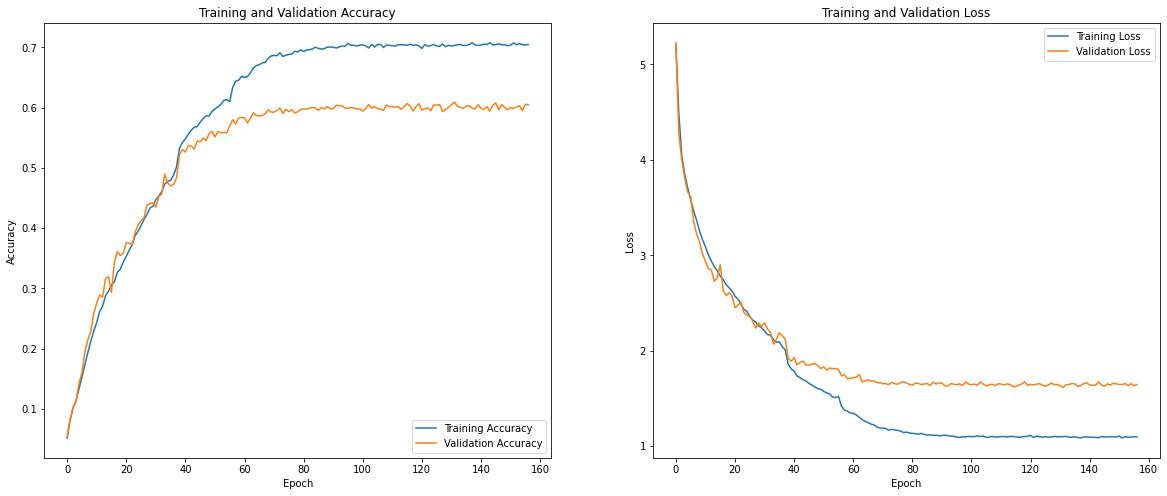

In [ ]:
plot_diagrams(history1, epochs=157)

#### Best model1

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn 
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Cifar 100 Best Model1'
best_model = load_model(checkpoint_filepath)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255, X_test/255

y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

In [ ]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)

313/313 - 111s - loss: 1.6751 - accuracy: 0.5992 - 111s/epoch - 355ms/step


In [ ]:
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

Test accuracy: 59.92%


In [ ]:
predicted_labels = best_model.predict(X_test)
predicted_classes = np.argmax(predicted_labels, axis=1)
# Convert labels from one hot encoding to numbers
test_labels_not_encoded = np.argmax(y_test, axis=-1) 

class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
               'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
               'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
               'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
               'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
               'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
               'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
               'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
               'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 
               'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

313/313 [==============================] - 107s 339ms/step


In [35]:
def plot_confusion_matrix(y_test, y_pred, classes):
    fig, ax = plt.subplots(figsize=(45, 45))
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(classes, rotation=45)
    ax.yaxis.set_ticklabels(classes, rotation=45)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

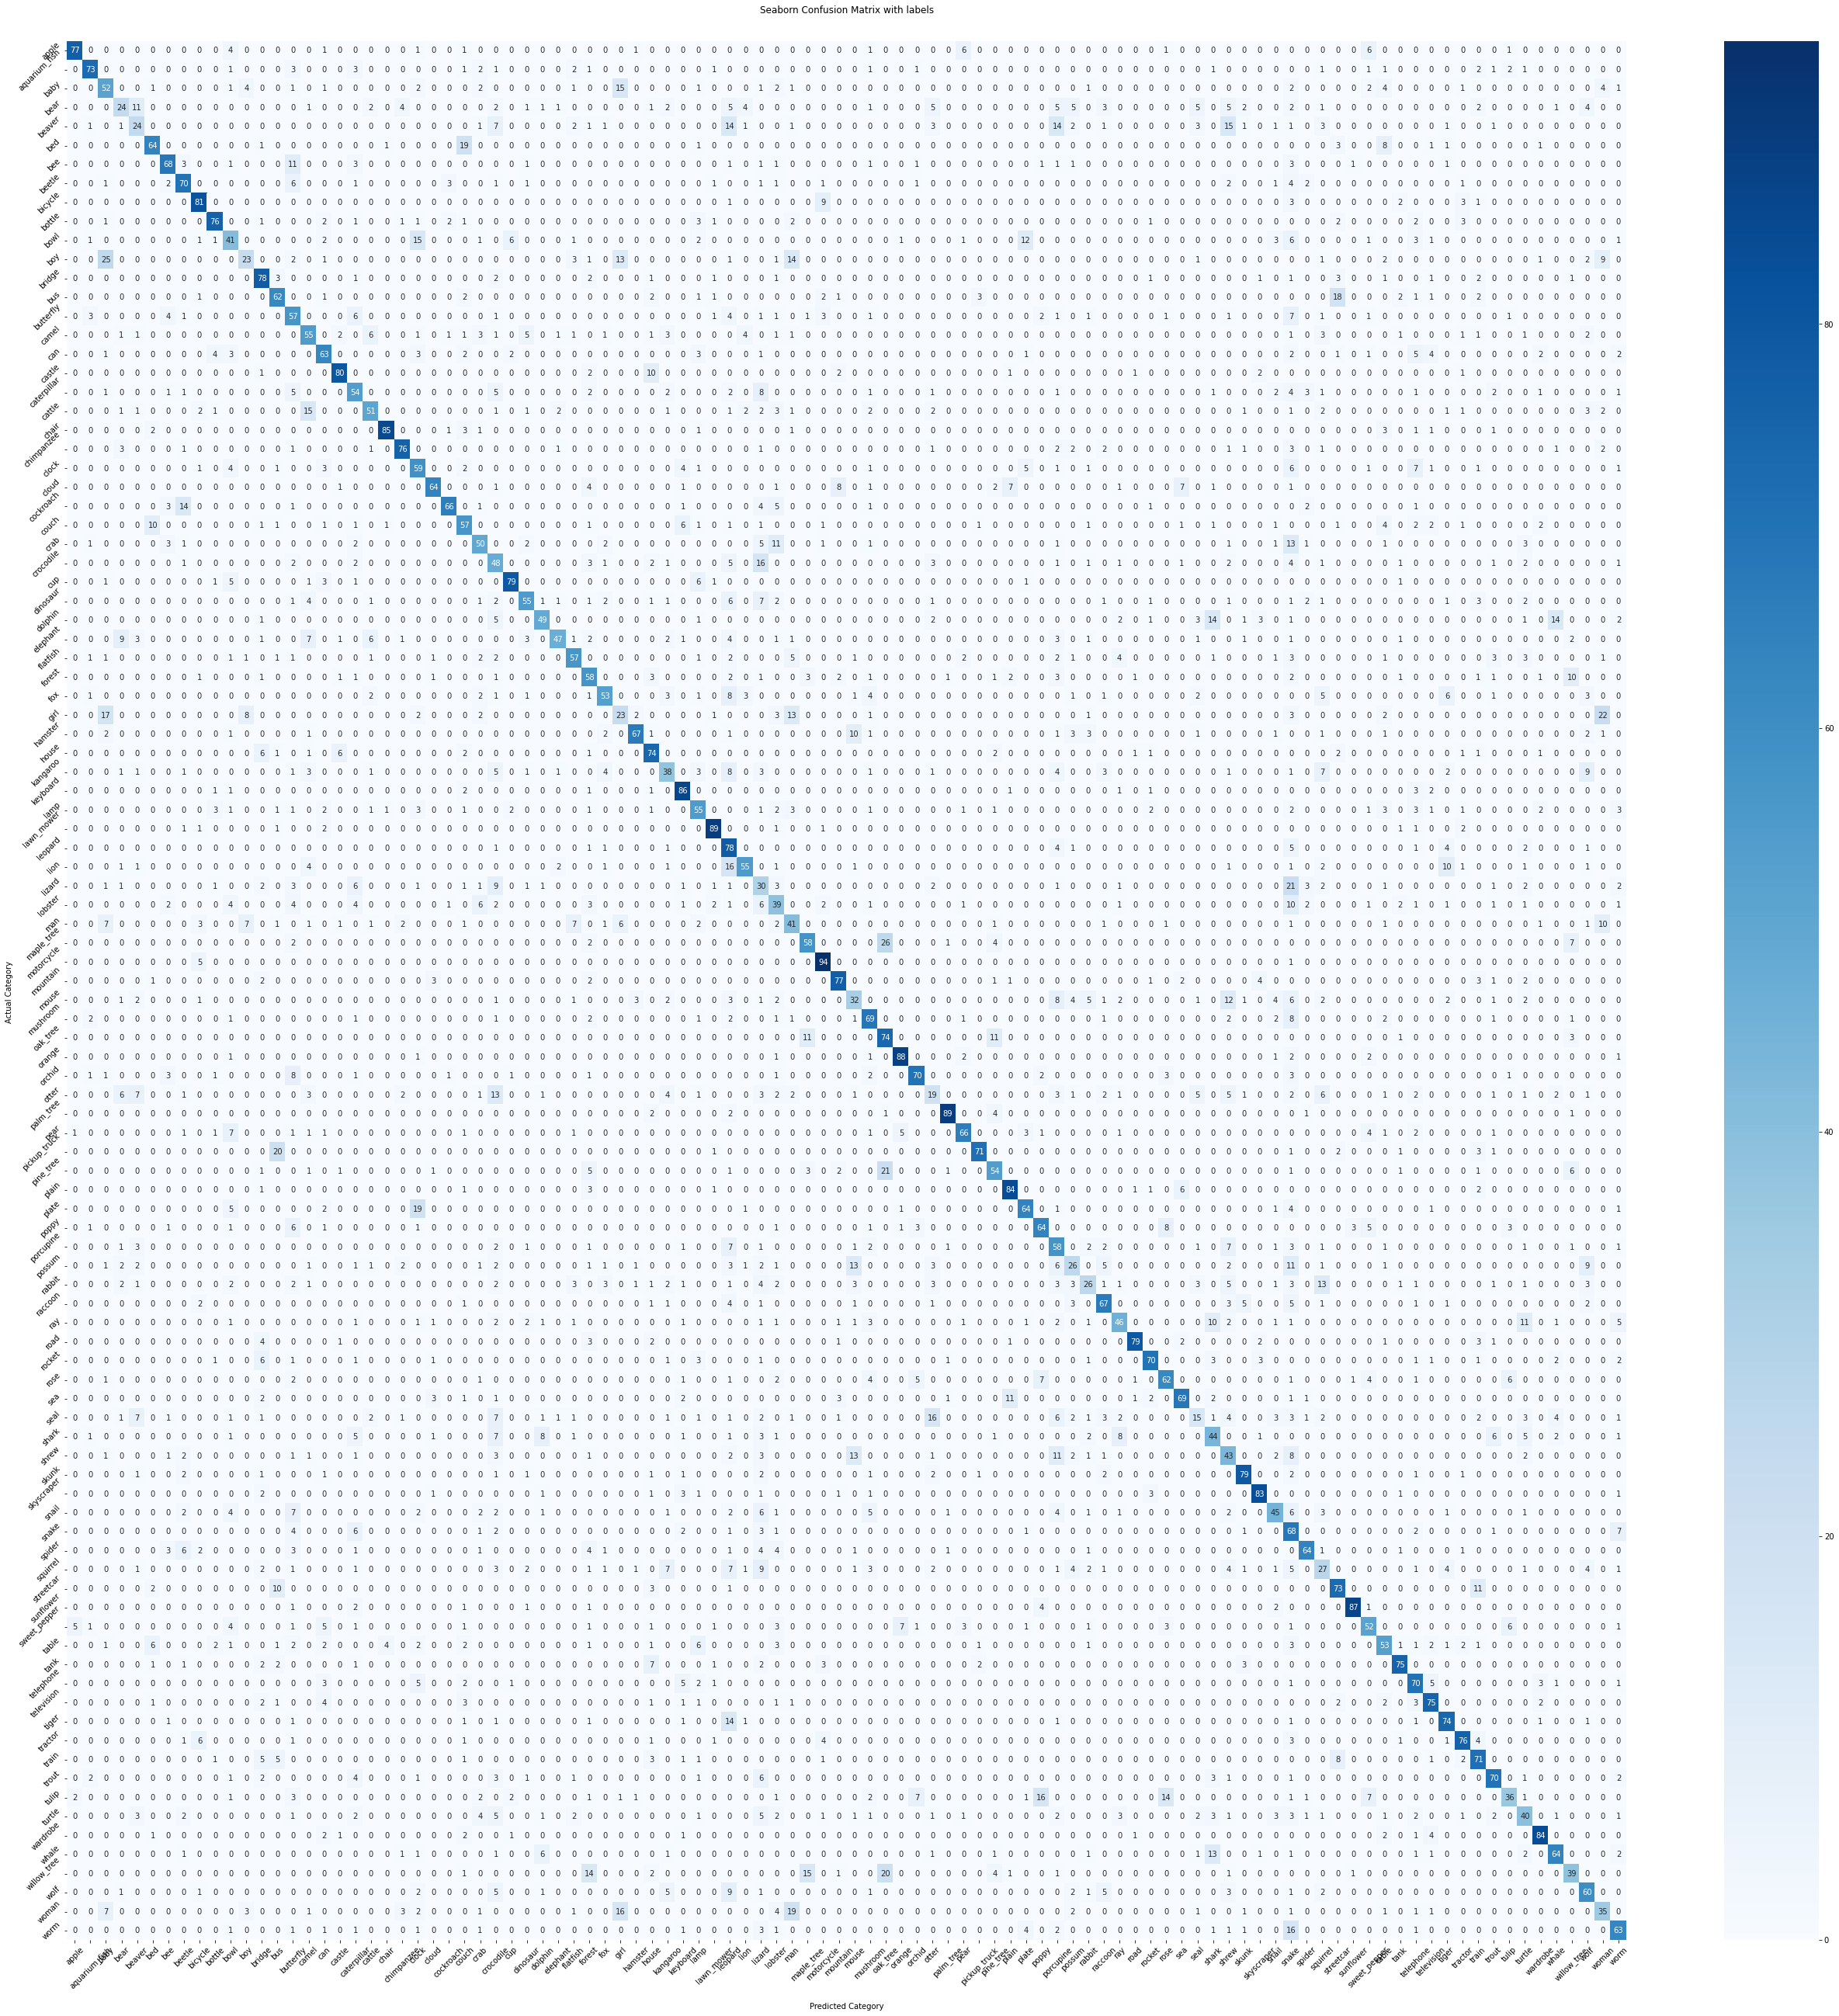

In [ ]:
plot_confusion_matrix(test_labels_not_encoded, predicted_classes, class_names)

### Model for 20 superclasses.

In [ ]:
# Early stopping`
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Cifar 100 Best Model2'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

batch_size = 32

In [ ]:
from keras import regularizers

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="Mish", padding="same", input_shape=(32, 32, 3), kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), activation="Mish", padding="same", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(512, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="Mish", kernel_initializer='he_normal', 
                          kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4), bias_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(20, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(datagen.flow(X2_train, y2_train, batch_size=batch_size, subset='training'),
                        steps_per_epoch=steps_per_epoch,
                        validation_data=datagen.flow(X2_train, y2_train, batch_size=batch_size, subset='validation'),
                        validation_steps=validation_steps,
                        epochs=500, batch_size=batch_size, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/500
1326/1327 [============================>.] - ETA: 0s - loss: 3.7804 - accuracy: 0.1609

1327/1327 [==============================] - 65s 46ms/step - loss: 3.7802 - accuracy: 0.1609 - val_loss: 3.4662 - val_accuracy: 0.2091 - lr: 0.0010
Epoch 2/500
1326/1327 [============================>.] - ETA: 0s - loss: 3.2282 - accuracy: 0.2350

1327/1327 [==============================] - 58s 44ms/step - loss: 3.2282 - accuracy: 0.2350 - val_loss: 3.1822 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 3/500
1327/1327 [==============================] - ETA: 0s - loss: 2.7738 - accuracy: 0.2773

1327/1327 [==============================] - 59s 45ms/step - loss: 2.7738 - accuracy: 0.2773 - val_loss: 2.6398 - val_accuracy: 0.2853 - lr: 0.0010
Epoch 4/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.5001 - accuracy: 0.3021

1327/1327 [==============================] - 57s 43ms/step - loss: 2.5000 - accuracy: 0.3021 - val_loss: 2.3683 - val_accuracy: 0.3279 - lr: 0.0010
Epoch 5/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.3358 - accuracy: 0.3379

1327/1327 [==============================] - 59s 44ms/step - loss: 2.3359 - accuracy: 0.3379 - val_loss: 2.2424 - val_accuracy: 0.3653 - lr: 0.0010
Epoch 6/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.2285 - accuracy: 0.3729

1327/1327 [==============================] - 58s 44ms/step - loss: 2.2287 - accuracy: 0.3729 - val_loss: 2.0896 - val_accuracy: 0.4034 - lr: 0.0010
Epoch 7/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.1478 - accuracy: 0.3979

1327/1327 [==============================] - 58s 44ms/step - loss: 2.1477 - accuracy: 0.3979 - val_loss: 2.0490 - val_accuracy: 0.4235 - lr: 0.0010
Epoch 8/500
1326/1327 [============================>.] - ETA: 0s - loss: 2.0502 - accuracy: 0.4278

1327/1327 [==============================] - 60s 45ms/step - loss: 2.0502 - accuracy: 0.4278 - val_loss: 1.9775 - val_accuracy: 0.4422 - lr: 0.0010
Epoch 9/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.9898 - accuracy: 0.4500

1327/1327 [==============================] - 59s 44ms/step - loss: 1.9897 - accuracy: 0.4501 - val_loss: 1.8365 - val_accuracy: 0.4784 - lr: 0.0010
Epoch 10/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.9065 - accuracy: 0.4745 - val_loss: 1.8571 - val_accuracy: 0.4790 - lr: 0.0010
Epoch 11/500
1327/1327 [==============================] - ETA: 0s - loss: 1.8380 - accuracy: 0.4963

1327/1327 [==============================] - 57s 43ms/step - loss: 1.8380 - accuracy: 0.4963 - val_loss: 1.7438 - val_accuracy: 0.5112 - lr: 0.0010
Epoch 12/500
1327/1327 [==============================] - 54s 41ms/step - loss: 1.7782 - accuracy: 0.5132 - val_loss: 1.7681 - val_accuracy: 0.5080 - lr: 0.0010
Epoch 13/500
1327/1327 [==============================] - ETA: 0s - loss: 1.7284 - accuracy: 0.5250

1327/1327 [==============================] - 57s 43ms/step - loss: 1.7284 - accuracy: 0.5250 - val_loss: 1.6686 - val_accuracy: 0.5373 - lr: 0.0010
Epoch 14/500
1327/1327 [==============================] - ETA: 0s - loss: 1.6723 - accuracy: 0.5392

1327/1327 [==============================] - 57s 43ms/step - loss: 1.6723 - accuracy: 0.5392 - val_loss: 1.5942 - val_accuracy: 0.5594 - lr: 0.0010
Epoch 15/500
1327/1327 [==============================] - 50s 38ms/step - loss: 1.6360 - accuracy: 0.5549 - val_loss: 1.6221 - val_accuracy: 0.5545 - lr: 0.0010
Epoch 16/500
1327/1327 [==============================] - ETA: 0s - loss: 1.5893 - accuracy: 0.5621

1327/1327 [==============================] - 57s 43ms/step - loss: 1.5893 - accuracy: 0.5621 - val_loss: 1.5187 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 17/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.5519 - accuracy: 0.5739 - val_loss: 1.5528 - val_accuracy: 0.5731 - lr: 0.0010
Epoch 18/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.5121 - accuracy: 0.5824

1327/1327 [==============================] - 57s 43ms/step - loss: 1.5123 - accuracy: 0.5823 - val_loss: 1.4738 - val_accuracy: 0.5940 - lr: 0.0010
Epoch 19/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.4871 - accuracy: 0.5941 - val_loss: 1.5370 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 20/500
1327/1327 [==============================] - ETA: 0s - loss: 1.4638 - accuracy: 0.5992

1327/1327 [==============================] - 57s 43ms/step - loss: 1.4638 - accuracy: 0.5992 - val_loss: 1.3927 - val_accuracy: 0.6173 - lr: 0.0010
Epoch 21/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.4161 - accuracy: 0.6131 - val_loss: 1.4072 - val_accuracy: 0.6147 - lr: 0.0010
Epoch 22/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.4080 - accuracy: 0.6181

1327/1327 [==============================] - 60s 45ms/step - loss: 1.4082 - accuracy: 0.6181 - val_loss: 1.3508 - val_accuracy: 0.6223 - lr: 0.0010
Epoch 23/500
1327/1327 [==============================] - 50s 38ms/step - loss: 1.3761 - accuracy: 0.6227 - val_loss: 1.4008 - val_accuracy: 0.6130 - lr: 0.0010
Epoch 24/500
1327/1327 [==============================] - 52s 39ms/step - loss: 1.3497 - accuracy: 0.6355 - val_loss: 1.3881 - val_accuracy: 0.6153 - lr: 0.0010
Epoch 25/500
1327/1327 [==============================] - ETA: 0s - loss: 1.3299 - accuracy: 0.6400

1327/1327 [==============================] - 59s 45ms/step - loss: 1.3299 - accuracy: 0.6400 - val_loss: 1.3207 - val_accuracy: 0.6398 - lr: 0.0010
Epoch 26/500
1327/1327 [==============================] - ETA: 0s - loss: 1.3063 - accuracy: 0.6475

1327/1327 [==============================] - 60s 45ms/step - loss: 1.3063 - accuracy: 0.6475 - val_loss: 1.3204 - val_accuracy: 0.6321 - lr: 0.0010
Epoch 27/500
1327/1327 [==============================] - ETA: 0s - loss: 1.2857 - accuracy: 0.6540

1327/1327 [==============================] - 57s 43ms/step - loss: 1.2857 - accuracy: 0.6540 - val_loss: 1.2996 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 28/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.2703 - accuracy: 0.6590

1327/1327 [==============================] - 57s 43ms/step - loss: 1.2704 - accuracy: 0.6589 - val_loss: 1.2977 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 29/500
1327/1327 [==============================] - ETA: 0s - loss: 1.2402 - accuracy: 0.6682

1327/1327 [==============================] - 58s 44ms/step - loss: 1.2402 - accuracy: 0.6682 - val_loss: 1.2894 - val_accuracy: 0.6437 - lr: 0.0010
Epoch 30/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.2209 - accuracy: 0.6746

1327/1327 [==============================] - 57s 43ms/step - loss: 1.2205 - accuracy: 0.6746 - val_loss: 1.2352 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 31/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.2062 - accuracy: 0.6780

1327/1327 [==============================] - 57s 43ms/step - loss: 1.2060 - accuracy: 0.6780 - val_loss: 1.2342 - val_accuracy: 0.6616 - lr: 0.0010
Epoch 32/500
1327/1327 [==============================] - 50s 38ms/step - loss: 1.1913 - accuracy: 0.6827 - val_loss: 1.2872 - val_accuracy: 0.6569 - lr: 0.0010
Epoch 33/500
1327/1327 [==============================] - 48s 37ms/step - loss: 1.1716 - accuracy: 0.6904 - val_loss: 1.3214 - val_accuracy: 0.6466 - lr: 0.0010
Epoch 34/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.1628 - accuracy: 0.6919

1327/1327 [==============================] - 58s 44ms/step - loss: 1.1629 - accuracy: 0.6920 - val_loss: 1.2030 - val_accuracy: 0.6767 - lr: 0.0010
Epoch 35/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.1342 - accuracy: 0.6990 - val_loss: 1.2379 - val_accuracy: 0.6729 - lr: 0.0010
Epoch 36/500
1327/1327 [==============================] - 50s 37ms/step - loss: 1.1335 - accuracy: 0.6994 - val_loss: 1.2427 - val_accuracy: 0.6668 - lr: 0.0010
Epoch 37/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.1594 - accuracy: 0.6927 - val_loss: 1.2205 - val_accuracy: 0.6744 - lr: 0.0010
Epoch 38/500
1327/1327 [==============================] - ETA: 0s - loss: 1.0836 - accuracy: 0.7141

1327/1327 [==============================] - 58s 44ms/step - loss: 1.0836 - accuracy: 0.7141 - val_loss: 1.1762 - val_accuracy: 0.6868 - lr: 0.0010
Epoch 39/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.0733 - accuracy: 0.7194

1327/1327 [==============================] - 58s 44ms/step - loss: 1.0733 - accuracy: 0.7194 - val_loss: 1.1676 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 40/500
1327/1327 [==============================] - 48s 36ms/step - loss: 1.0708 - accuracy: 0.7176 - val_loss: 1.1842 - val_accuracy: 0.6824 - lr: 0.0010
Epoch 41/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.0554 - accuracy: 0.7217 - val_loss: 1.1825 - val_accuracy: 0.6822 - lr: 0.0010
Epoch 42/500
1326/1327 [============================>.] - ETA: 0s - loss: 1.0714 - accuracy: 0.7191

1327/1327 [==============================] - 57s 43ms/step - loss: 1.0713 - accuracy: 0.7192 - val_loss: 1.1216 - val_accuracy: 0.6964 - lr: 0.0010
Epoch 43/500
1327/1327 [==============================] - ETA: 0s - loss: 1.0303 - accuracy: 0.7295

1327/1327 [==============================] - 58s 44ms/step - loss: 1.0303 - accuracy: 0.7295 - val_loss: 1.1214 - val_accuracy: 0.7005 - lr: 0.0010
Epoch 44/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.0255 - accuracy: 0.7321 - val_loss: 1.1587 - val_accuracy: 0.6932 - lr: 0.0010
Epoch 45/500
1327/1327 [==============================] - 50s 37ms/step - loss: 1.0110 - accuracy: 0.7363 - val_loss: 1.1624 - val_accuracy: 0.6843 - lr: 0.0010
Epoch 46/500
1327/1327 [==============================] - 49s 37ms/step - loss: 1.0049 - accuracy: 0.7390 - val_loss: 1.1850 - val_accuracy: 0.6795 - lr: 0.0010
Epoch 47/500
1327/1327 [==============================] - 50s 37ms/step - loss: 0.9958 - accuracy: 0.7408 - val_loss: 1.1378 - val_accuracy: 0.6964 - lr: 0.0010
Epoch 48/500
1327/1327 [==============================] - ETA: 0s - loss: 0.8805 - accuracy: 0.7680

1327/1327 [==============================] - 57s 43ms/step - loss: 0.8805 - accuracy: 0.7680 - val_loss: 1.0563 - val_accuracy: 0.7185 - lr: 5.0000e-04
Epoch 49/500
1327/1327 [==============================] - ETA: 0s - loss: 0.8478 - accuracy: 0.7764

1327/1327 [==============================] - 58s 44ms/step - loss: 0.8478 - accuracy: 0.7764 - val_loss: 1.0247 - val_accuracy: 0.7256 - lr: 5.0000e-04
Epoch 50/500
1327/1327 [==============================] - 50s 38ms/step - loss: 0.8248 - accuracy: 0.7803 - val_loss: 1.0533 - val_accuracy: 0.7188 - lr: 5.0000e-04
Epoch 51/500
1327/1327 [==============================] - 48s 36ms/step - loss: 0.8182 - accuracy: 0.7808 - val_loss: 1.0414 - val_accuracy: 0.7204 - lr: 5.0000e-04
Epoch 52/500
1327/1327 [==============================] - 48s 36ms/step - loss: 0.7980 - accuracy: 0.7850 - val_loss: 1.0295 - val_accuracy: 0.7272 - lr: 5.0000e-04
Epoch 53/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.7712 - accuracy: 0.7927 - val_loss: 1.0360 - val_accuracy: 0.7249 - lr: 5.0000e-04
Epoch 54/500
1327/1327 [==============================] - ETA: 0s - loss: 0.7271 - accuracy: 0.8053

1327/1327 [==============================] - 57s 43ms/step - loss: 0.7271 - accuracy: 0.8053 - val_loss: 0.9650 - val_accuracy: 0.7356 - lr: 2.5000e-04
Epoch 55/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.7049 - accuracy: 0.8087 - val_loss: 0.9739 - val_accuracy: 0.7380 - lr: 2.5000e-04
Epoch 56/500
1327/1327 [==============================] - 50s 37ms/step - loss: 0.6903 - accuracy: 0.8138 - val_loss: 1.0071 - val_accuracy: 0.7326 - lr: 2.5000e-04
Epoch 57/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.6867 - accuracy: 0.8132 - val_loss: 0.9924 - val_accuracy: 0.7400 - lr: 2.5000e-04
Epoch 58/500
1327/1327 [==============================] - 50s 38ms/step - loss: 0.6709 - accuracy: 0.8180 - val_loss: 0.9764 - val_accuracy: 0.7399 - lr: 2.5000e-04
Epoch 59/500
1327/1327 [==============================] - ETA: 0s - loss: 0.6433 - accuracy: 0.8251

1327/1327 [==============================] - 60s 45ms/step - loss: 0.6433 - accuracy: 0.8251 - val_loss: 0.9614 - val_accuracy: 0.7469 - lr: 1.2500e-04
Epoch 60/500
1327/1327 [==============================] - 51s 39ms/step - loss: 0.6293 - accuracy: 0.8288 - val_loss: 0.9915 - val_accuracy: 0.7392 - lr: 1.2500e-04
Epoch 61/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.6155 - accuracy: 0.8300

1327/1327 [==============================] - 59s 44ms/step - loss: 0.6154 - accuracy: 0.8301 - val_loss: 0.9538 - val_accuracy: 0.7465 - lr: 1.2500e-04
Epoch 62/500
1327/1327 [==============================] - 50s 38ms/step - loss: 0.6211 - accuracy: 0.8306 - val_loss: 0.9625 - val_accuracy: 0.7439 - lr: 1.2500e-04
Epoch 63/500
1327/1327 [==============================] - ETA: 0s - loss: 0.6088 - accuracy: 0.8334

1327/1327 [==============================] - 60s 45ms/step - loss: 0.6088 - accuracy: 0.8334 - val_loss: 0.9536 - val_accuracy: 0.7449 - lr: 1.2500e-04
Epoch 64/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.6022 - accuracy: 0.8314

1327/1327 [==============================] - 60s 45ms/step - loss: 0.6022 - accuracy: 0.8314 - val_loss: 0.9445 - val_accuracy: 0.7505 - lr: 1.2500e-04
Epoch 65/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.6006 - accuracy: 0.8343

1327/1327 [==============================] - 58s 44ms/step - loss: 0.6005 - accuracy: 0.8343 - val_loss: 0.9356 - val_accuracy: 0.7476 - lr: 1.2500e-04
Epoch 66/500
1327/1327 [==============================] - 53s 40ms/step - loss: 0.6000 - accuracy: 0.8344 - val_loss: 0.9613 - val_accuracy: 0.7475 - lr: 1.2500e-04
Epoch 67/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.5922 - accuracy: 0.8378

1327/1327 [==============================] - 59s 44ms/step - loss: 0.5921 - accuracy: 0.8378 - val_loss: 0.9329 - val_accuracy: 0.7519 - lr: 1.2500e-04
Epoch 68/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.5805 - accuracy: 0.8379 - val_loss: 0.9695 - val_accuracy: 0.7435 - lr: 1.2500e-04
Epoch 69/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.5842 - accuracy: 0.8400 - val_loss: 0.9513 - val_accuracy: 0.7491 - lr: 1.2500e-04
Epoch 70/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.5803 - accuracy: 0.8398 - val_loss: 0.9619 - val_accuracy: 0.7443 - lr: 1.2500e-04
Epoch 71/500
1327/1327 [==============================] - 50s 37ms/step - loss: 0.5776 - accuracy: 0.8418 - val_loss: 0.9394 - val_accuracy: 0.7516 - lr: 1.2500e-04
Epoch 72/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.5556 - accuracy: 0.8459 - val_loss: 0.9352 - val_accuracy: 0.7503 - lr: 6.2500e-05
Epoch 73/500
1327/1327 

1327/1327 [==============================] - 59s 44ms/step - loss: 0.5498 - accuracy: 0.8462 - val_loss: 0.9275 - val_accuracy: 0.7500 - lr: 3.1250e-05
Epoch 77/500
1327/1327 [==============================] - 51s 38ms/step - loss: 0.5447 - accuracy: 0.8473 - val_loss: 0.9372 - val_accuracy: 0.7493 - lr: 3.1250e-05
Epoch 78/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.5321 - accuracy: 0.8511 - val_loss: 0.9487 - val_accuracy: 0.7505 - lr: 3.1250e-05
Epoch 79/500
1326/1327 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.8497

1327/1327 [==============================] - 60s 45ms/step - loss: 0.5375 - accuracy: 0.8497 - val_loss: 0.9207 - val_accuracy: 0.7557 - lr: 3.1250e-05
Epoch 80/500
1327/1327 [==============================] - 53s 40ms/step - loss: 0.5223 - accuracy: 0.8531 - val_loss: 0.9404 - val_accuracy: 0.7500 - lr: 3.1250e-05
Epoch 81/500
1327/1327 [==============================] - 50s 38ms/step - loss: 0.5268 - accuracy: 0.8522 - val_loss: 0.9348 - val_accuracy: 0.7525 - lr: 3.1250e-05
Epoch 82/500
1327/1327 [==============================] - 51s 38ms/step - loss: 0.5229 - accuracy: 0.8535 - val_loss: 0.9597 - val_accuracy: 0.7519 - lr: 3.1250e-05
Epoch 83/500
1327/1327 [==============================] - 52s 39ms/step - loss: 0.5244 - accuracy: 0.8543 - val_loss: 0.9599 - val_accuracy: 0.7483 - lr: 3.1250e-05
Epoch 84/500
1327/1327 [==============================] - 50s 38ms/step - loss: 0.5204 - accuracy: 0.8529 - val_loss: 0.9642 - val_accuracy: 0.7511 - lr: 1.5625e-05
Epoch 85/500
1327/1327 

1327/1327 [==============================] - 59s 45ms/step - loss: 0.5151 - accuracy: 0.8529 - val_loss: 0.9162 - val_accuracy: 0.7513 - lr: 1.9531e-06
Epoch 100/500
1327/1327 [==============================] - 50s 37ms/step - loss: 0.5134 - accuracy: 0.8555 - val_loss: 0.9298 - val_accuracy: 0.7539 - lr: 1.9531e-06
Epoch 101/500
1327/1327 [==============================] - 53s 40ms/step - loss: 0.5191 - accuracy: 0.8539 - val_loss: 0.9323 - val_accuracy: 0.7515 - lr: 1.9531e-06
Epoch 102/500
1327/1327 [==============================] - 49s 37ms/step - loss: 0.5123 - accuracy: 0.8552 - val_loss: 0.9287 - val_accuracy: 0.7557 - lr: 1.9531e-06
Epoch 103/500
1327/1327 [==============================] - 50s 38ms/step - loss: 0.5172 - accuracy: 0.8557 - val_loss: 0.9210 - val_accuracy: 0.7555 - lr: 1.9531e-06
Epoch 104/500
1327/1327 [==============================] - 50s 38ms/step - loss: 0.5049 - accuracy: 0.8572 - val_loss: 0.9383 - val_accuracy: 0.7505 - lr: 1.0000e-06
Epoch 105/500
1327

In [ ]:
train_loss2, train_acc2 = model2.evaluate(X2_train,  y2_train, verbose=2)
print("Train accuracy2: " + "{:.2f}".format(train_acc2*100) + "%")

1563/1563 - 14s - loss: 0.4471 - accuracy: 0.8763 - 14s/epoch - 9ms/step
Train accuracy2: 87.63%


In [ ]:
test_loss2, test_acc2 = model2.evaluate(X2_test,  y2_test, verbose=2)
print("Test accuracy2: " + "{:.2f}".format(test_acc2*100) + "%")

313/313 - 3s - loss: 0.9503 - accuracy: 0.7535 - 3s/epoch - 9ms/step
Test accuracy2: 75.35%


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 64)      

In [ ]:
trainable_params2 = count_params(model2.trainable_weights)
non_trainable_params2 = count_params(model2.non_trainable_weights)
print("Trainable params2:", trainable_params2)
print("Non trainable params2:", non_trainable_params2)

Trainable params2: 14326324
Non trainable params2: 11904


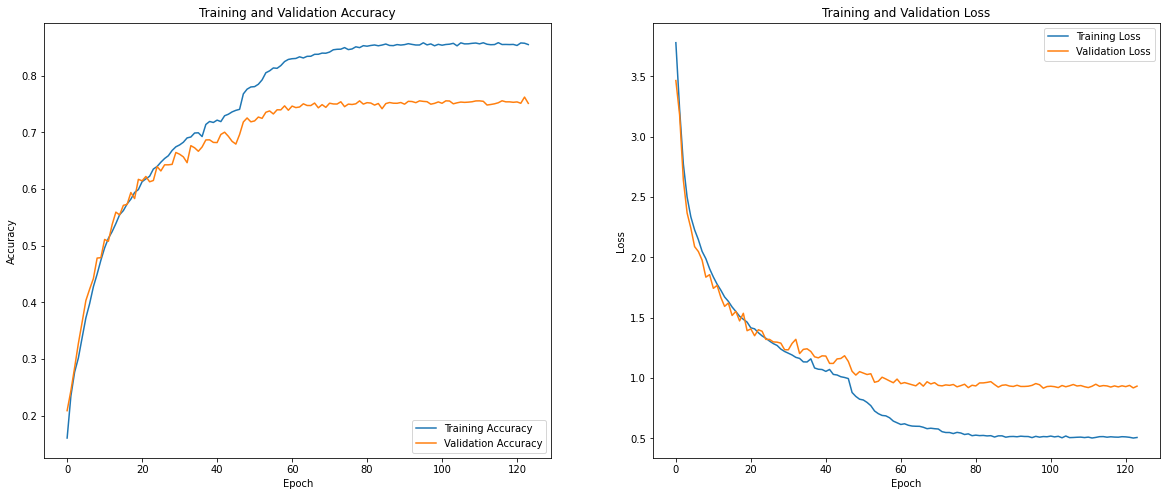

In [29]:
plot_diagrams(history2, epochs=124)

#### Best model2

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn 
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Cifar 100 Best Model2'
best_model = load_model(checkpoint_filepath)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255, X_test/255

y_train = tf.keras.utils.to_categorical(y_train, 20)
y_test = tf.keras.utils.to_categorical(y_test, 20)

In [43]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)

313/313 - 4s - loss: 0.9503 - accuracy: 0.7535 - 4s/epoch - 11ms/step


In [44]:
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

Test accuracy: 75.35%


In [54]:
def plot_confusion_matrix(y_test, y_pred, classes):
    fig, ax = plt.subplots(figsize=(15, 15))
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(classes, rotation=90)
    ax.yaxis.set_ticklabels(classes, rotation=45)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

313/313 [==============================] - 3s 10ms/step


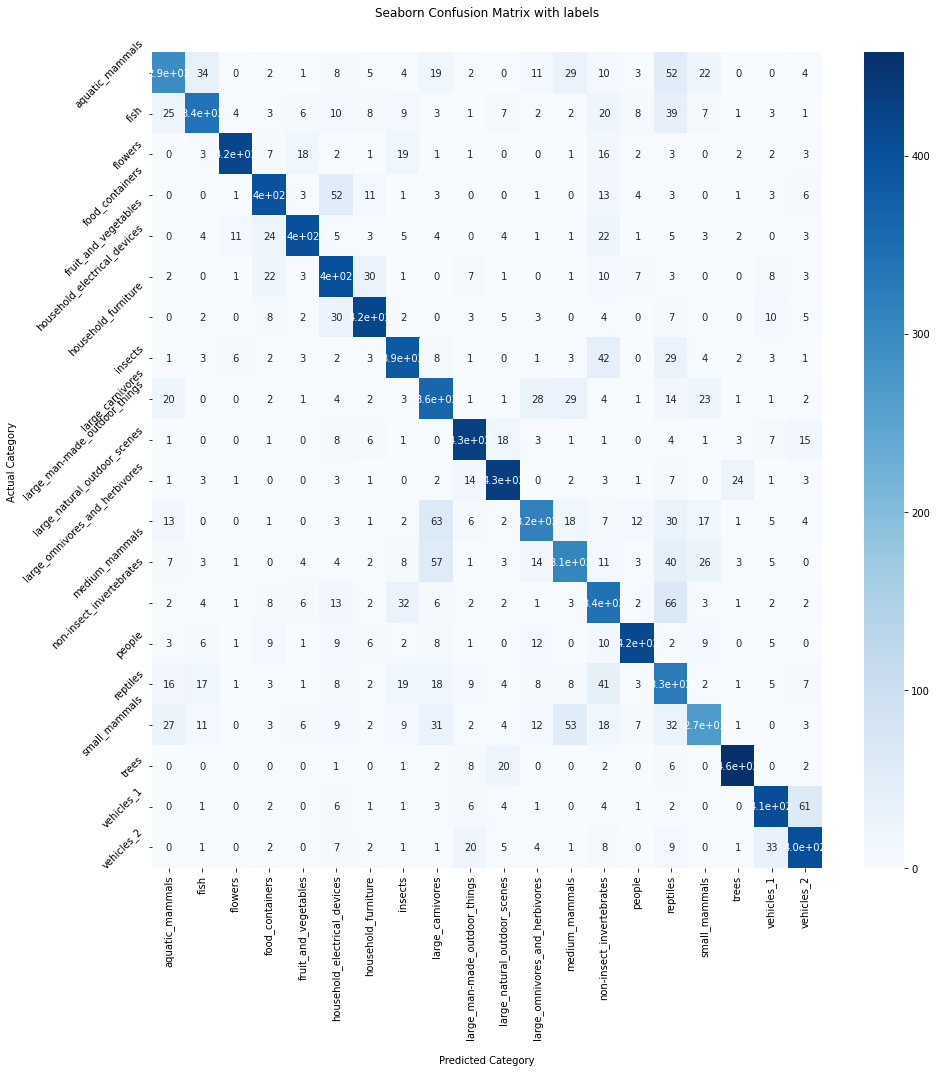

In [55]:
predicted_labels = best_model.predict(X_test)
predicted_classes = np.argmax(predicted_labels, axis=1)
# Convert labels from one hot encoding to numbers
test_labels_not_encoded = np.argmax(y_test, axis=-1) 

superclass_names = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 
                    'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 
                    'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 
                    'trees', 'vehicles_1', 'vehicles_2']

plot_confusion_matrix(test_labels_not_encoded, predicted_classes, superclass_names)